In [1]:
!nvidia-smi

# node f / pip install 잘 안될때....
# import os
# os.environ["HTTP_PROXY"] = "http://192.168.45.100:3128"
# os.environ["HTTPS_PROXY"] = "http://192.168.45.100:3128"

Tue Aug  1 11:57:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:1B:00.0 Off |                    0 |
| N/A   49C    P0    53W / 250W |   3627MiB / 22919MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   

In [1]:
import os 

os.environ["CUDA_DEVICE_ORDER"]     =  'PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"]  =  '6'


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install SimpleITK
!pip install tqdm
!pip install -U scikit-learn
!pip install -U monai
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install python-gdcm pydicom pylibjpeg pandas
!pip install torchvision
!pip install matplotlib
!pip install opencv-python
!pip install albumentations
!pip install torch
!pip install tqdm
!pip install albumentations
!pip install scikit-image
!pip install opencv-python
!pip install ipywidgets


# Test Log 분석

- ## 230724_Cell_MaxViT_UNet_MTL

###########################################################
Metric  =  train_loss
Argsort =  [497 490 461 478 480]
Value   =  [1271.116741  1278.9274153 1280.8671411 1298.0050281 1298.4136916]
###########################################################
Metric  =  valid_loss
Argsort =  [216 117 128 179  93]
Value   =  [20905.7616447 23138.5028999 23626.7344738 24257.1045745 24701.4682061]
###########################################################
Metric  =  valid_dice_score
Argsort =  [193 137 131  94 201]
Value   =  [0.3061157 0.3060486 0.3049325 0.3039509 0.3037366]
###########################################################
Metric  =  valid_mF1
Argsort =  [138 117 119  98 137]
Value   =  [0.75635 0.75215 0.75175 0.7498  0.7464 ]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0

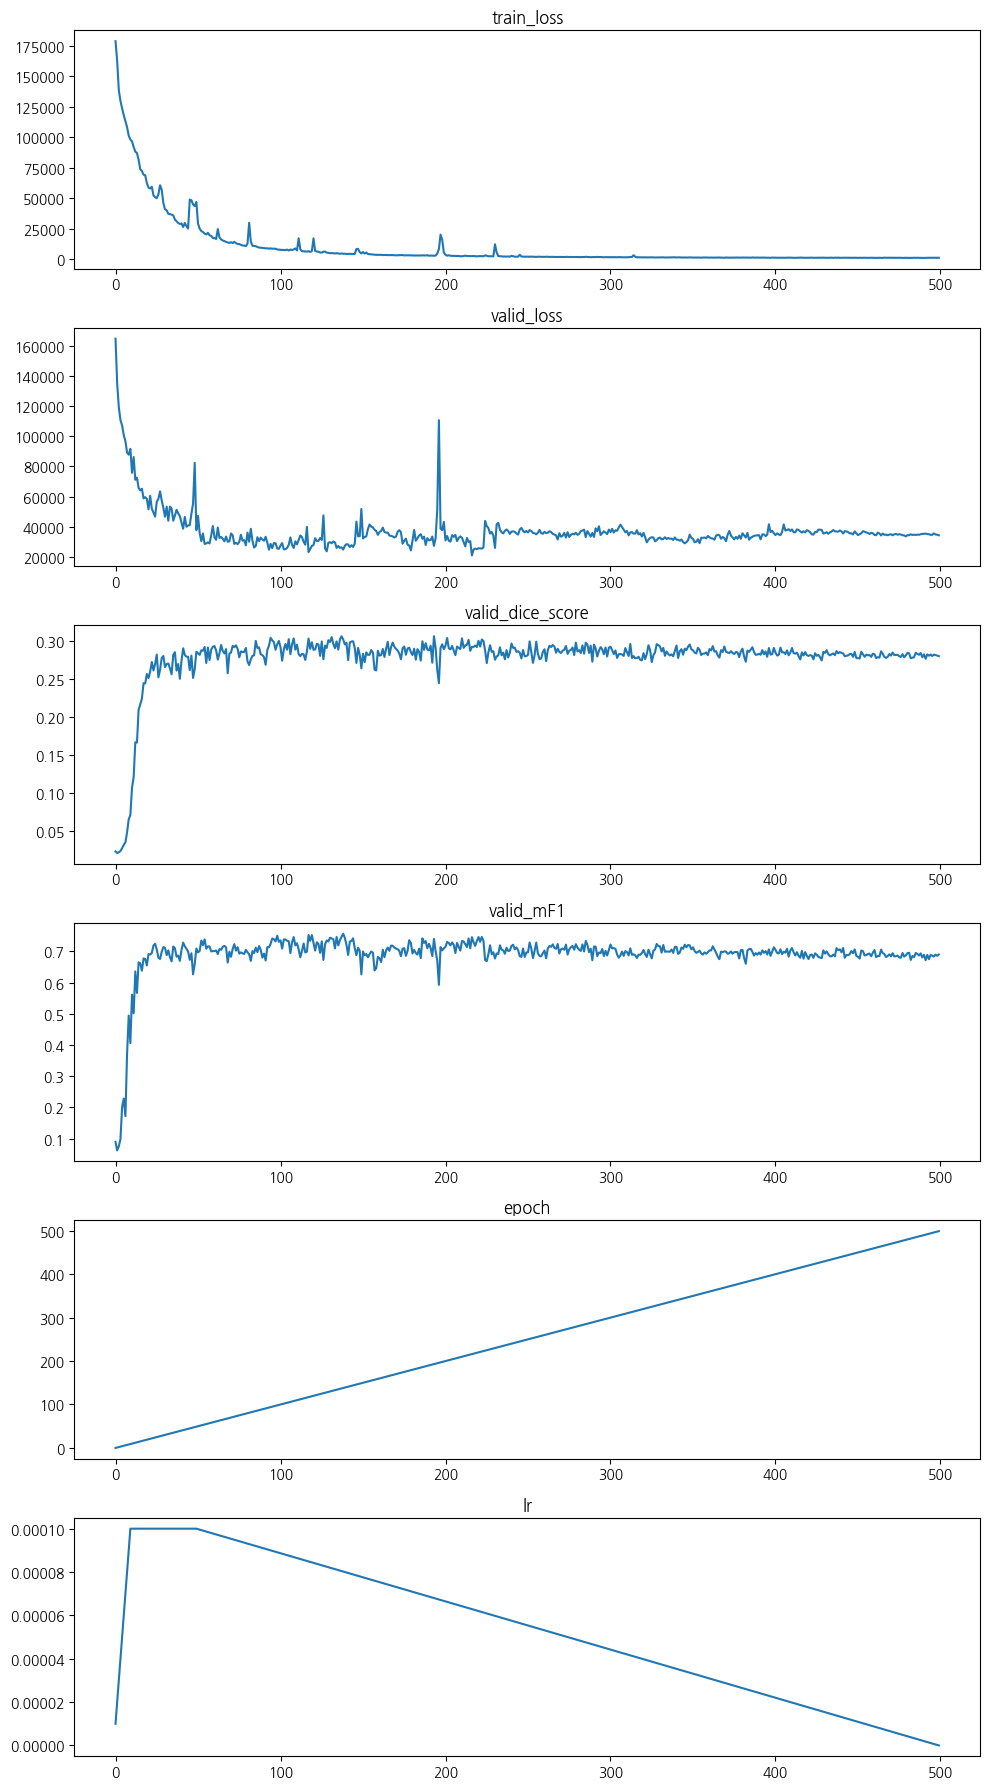

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230801_Cell_MaxViT_UNet_MTL_Cross_ResALL_CLAHE_Focal_remove_point/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230724_Cell_MaxViT_UNet_MTL_CLAHE

###########################################################
Metric  =  train_loss
Argsort =  [177 175 176 171 172]
Value   =  [0.599532  0.60138   0.6020379 0.6031436 0.6039386]
###########################################################
Metric  =  valid_loss
Argsort =  [ 98  97  99  91 153]
Value   =  [0.8674122 0.8680785 0.8686103 0.8691038 0.8713279]
###########################################################
Metric  =  valid_dice_score
Argsort =  [158 124 135 153 155]
Value   =  [0.4108249 0.4064348 0.4037209 0.4036498 0.4030389]
###########################################################
Metric  =  valid_mF1
Argsort =  [41 77 83 81 82]
Value   =  [0.7105  0.71015 0.70985 0.7059  0.70415]
###########################################################
Metric  =  epoch
Argsort =  [179 178 177 176 175]
Value   =  [179 178 177 176 175]
###########################################################
Metric  =  lr
Argsort =  [49 38 30 31 32]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


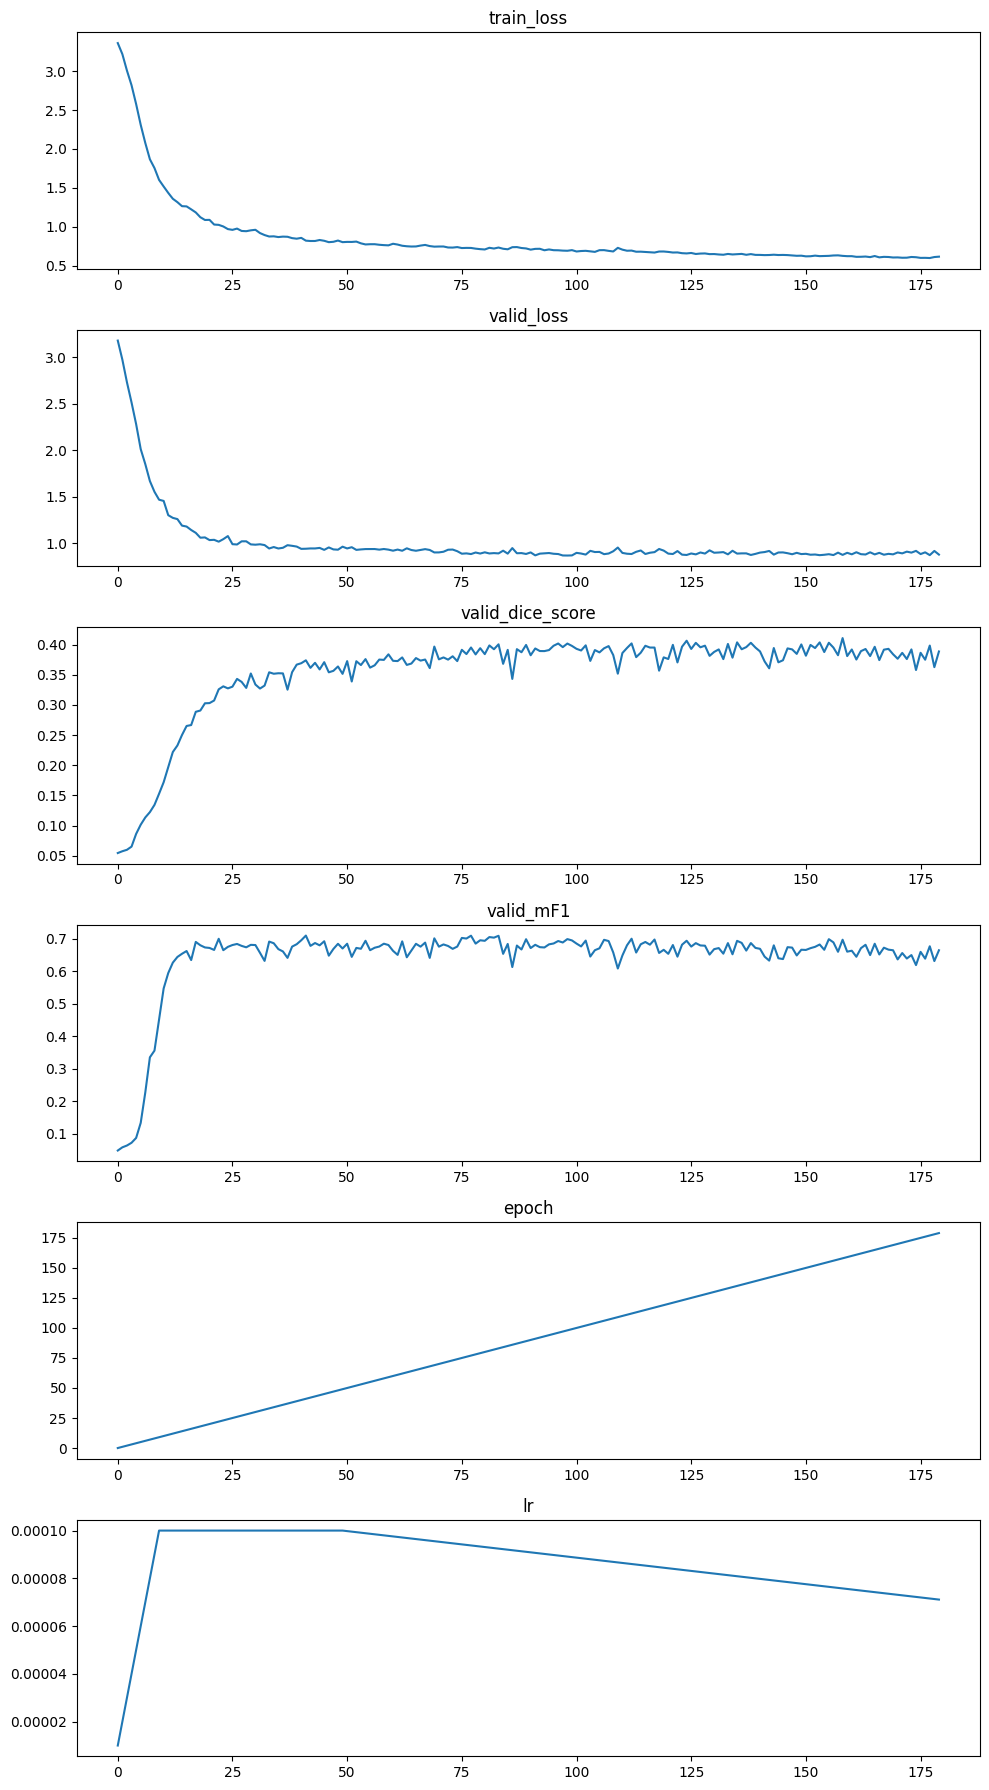

In [15]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230724_Cell_MaxViT_UNet_MTL_CLAHE/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_All_CLAHE

###########################################################
Metric  =  train_loss
Argsort =  [499 490 475 494 489]
Value   =  [0.2765855 0.2778392 0.2785234 0.2787264 0.2787667]
###########################################################
Metric  =  valid_loss
Argsort =  [132 121 159 114 186]
Value   =  [0.6214093 0.6222122 0.6230196 0.6291237 0.6302957]
###########################################################
Metric  =  valid_dice_score
Argsort =  [159 128 114 127 145]
Value   =  [0.413072  0.4108392 0.4101401 0.4099913 0.4097963]
###########################################################
Metric  =  valid_mF1
Argsort =  [ 41  82 159  83  65]
Value   =  [0.71065 0.70925 0.7083  0.7068  0.7048 ]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


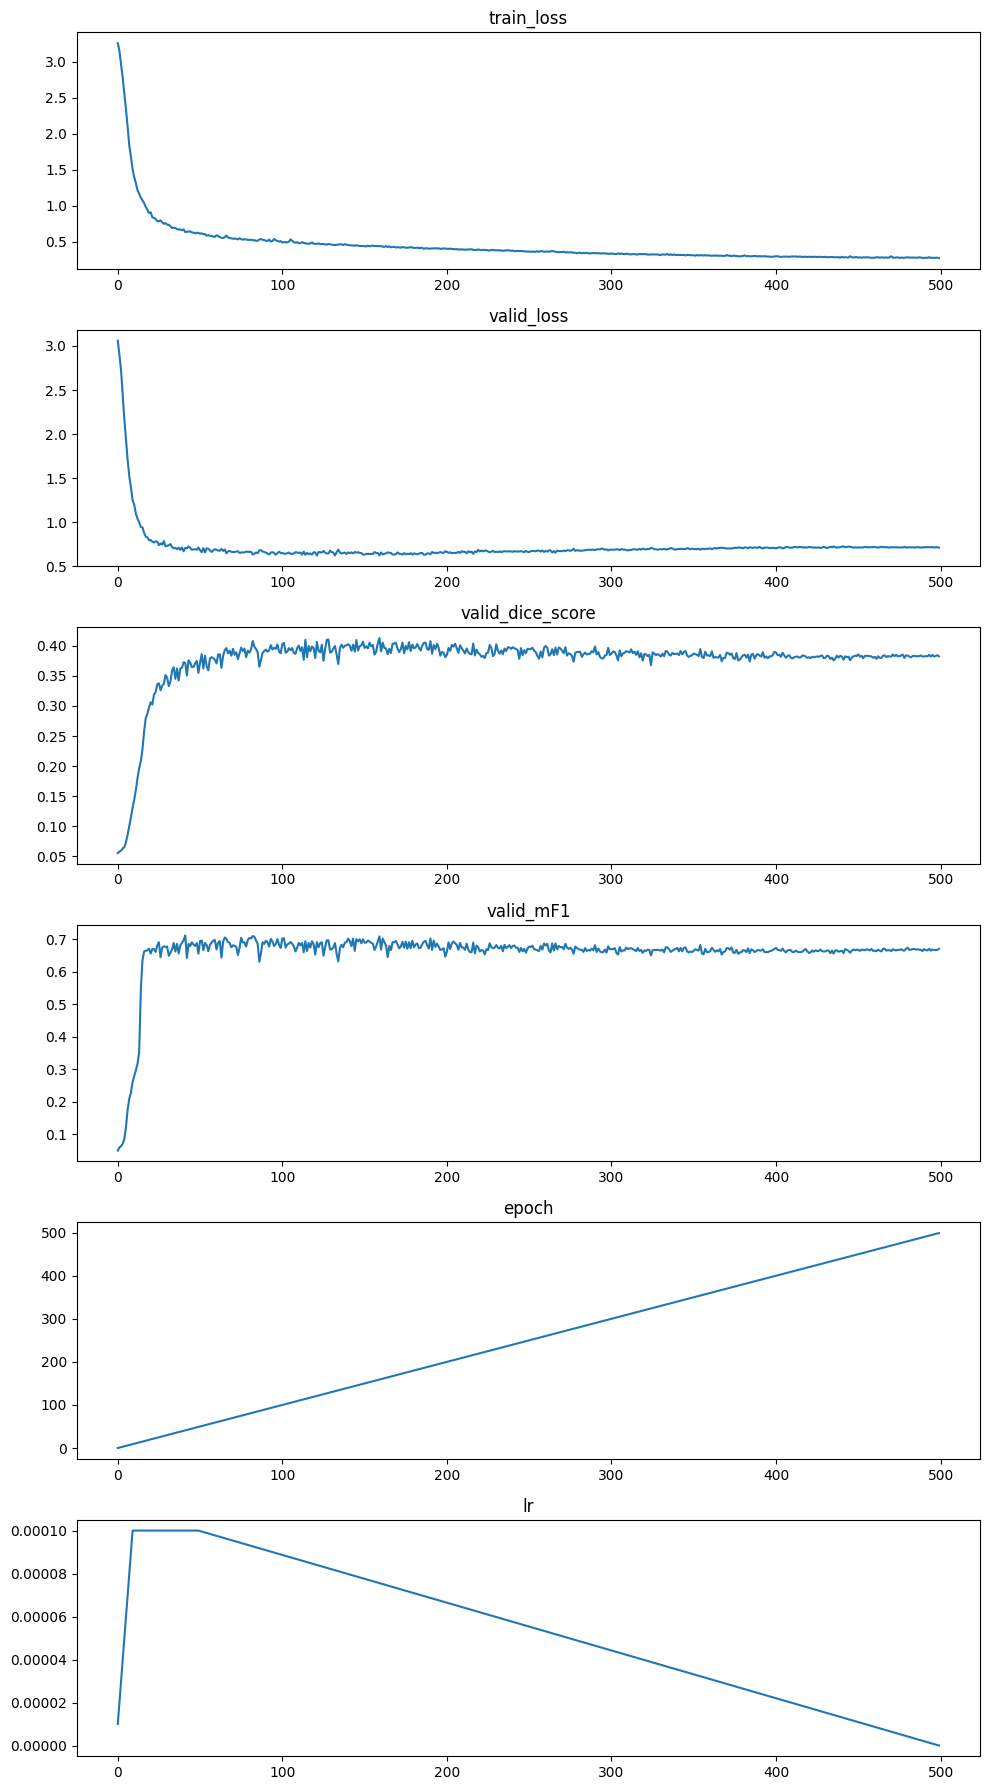

In [6]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230725_Cell_MaxViT_UNet_MTL_Cross_All_CLAHE/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_CLAHE

###########################################################
Metric  =  train_loss
Argsort =  [477 459 452 490 499]
Value   =  [0.4568962 0.4570926 0.4575812 0.4578147 0.458287 ]
###########################################################
Metric  =  valid_loss
Argsort =  [186 165 179 171 187]
Value   =  [0.8439982 0.8463905 0.8469196 0.8488398 0.849296 ]
###########################################################
Metric  =  valid_dice_score
Argsort =  [117 186 149 179 136]
Value   =  [0.4135576 0.4109218 0.4094816 0.4089174 0.4086071]
###########################################################
Metric  =  valid_mF1
Argsort =  [ 95 117 186  99  93]
Value   =  [0.71765 0.71685 0.7151  0.71465 0.71315]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


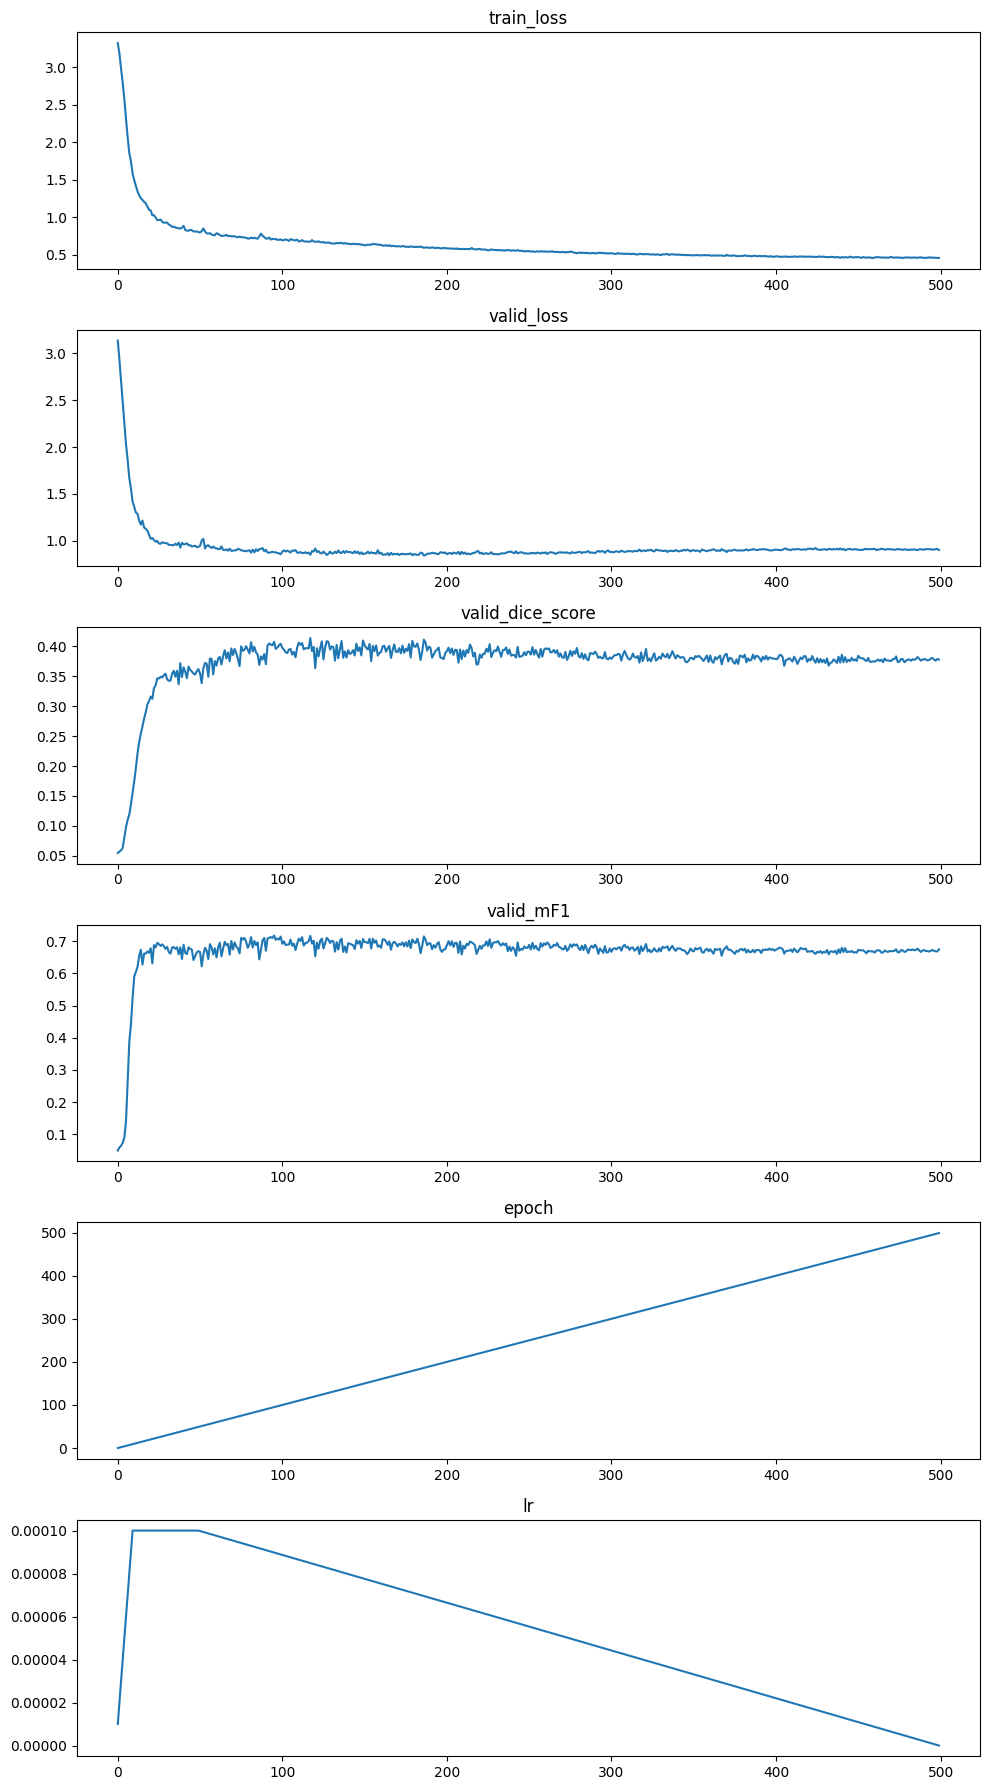

In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230725_Cell_MaxViT_UNet_MTL_Cross_CLAHE/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_Conv_CLAHE

###########################################################
Metric  =  train_loss
Argsort =  [496 497 485 478 489]
Value   =  [0.4674682 0.4696999 0.4699048 0.4709091 0.4712336]
###########################################################
Metric  =  valid_loss
Argsort =  [254 179 171 180 226]
Value   =  [0.8237685 0.8263286 0.8281152 0.8304566 0.8307315]
###########################################################
Metric  =  valid_dice_score
Argsort =  [180 171 254 184 252]
Value   =  [0.4181195 0.4167347 0.4161238 0.4140582 0.4137182]
###########################################################
Metric  =  valid_mF1
Argsort =  [171 254 169 184 179]
Value   =  [0.7253  0.7216  0.72105 0.71995 0.7192 ]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


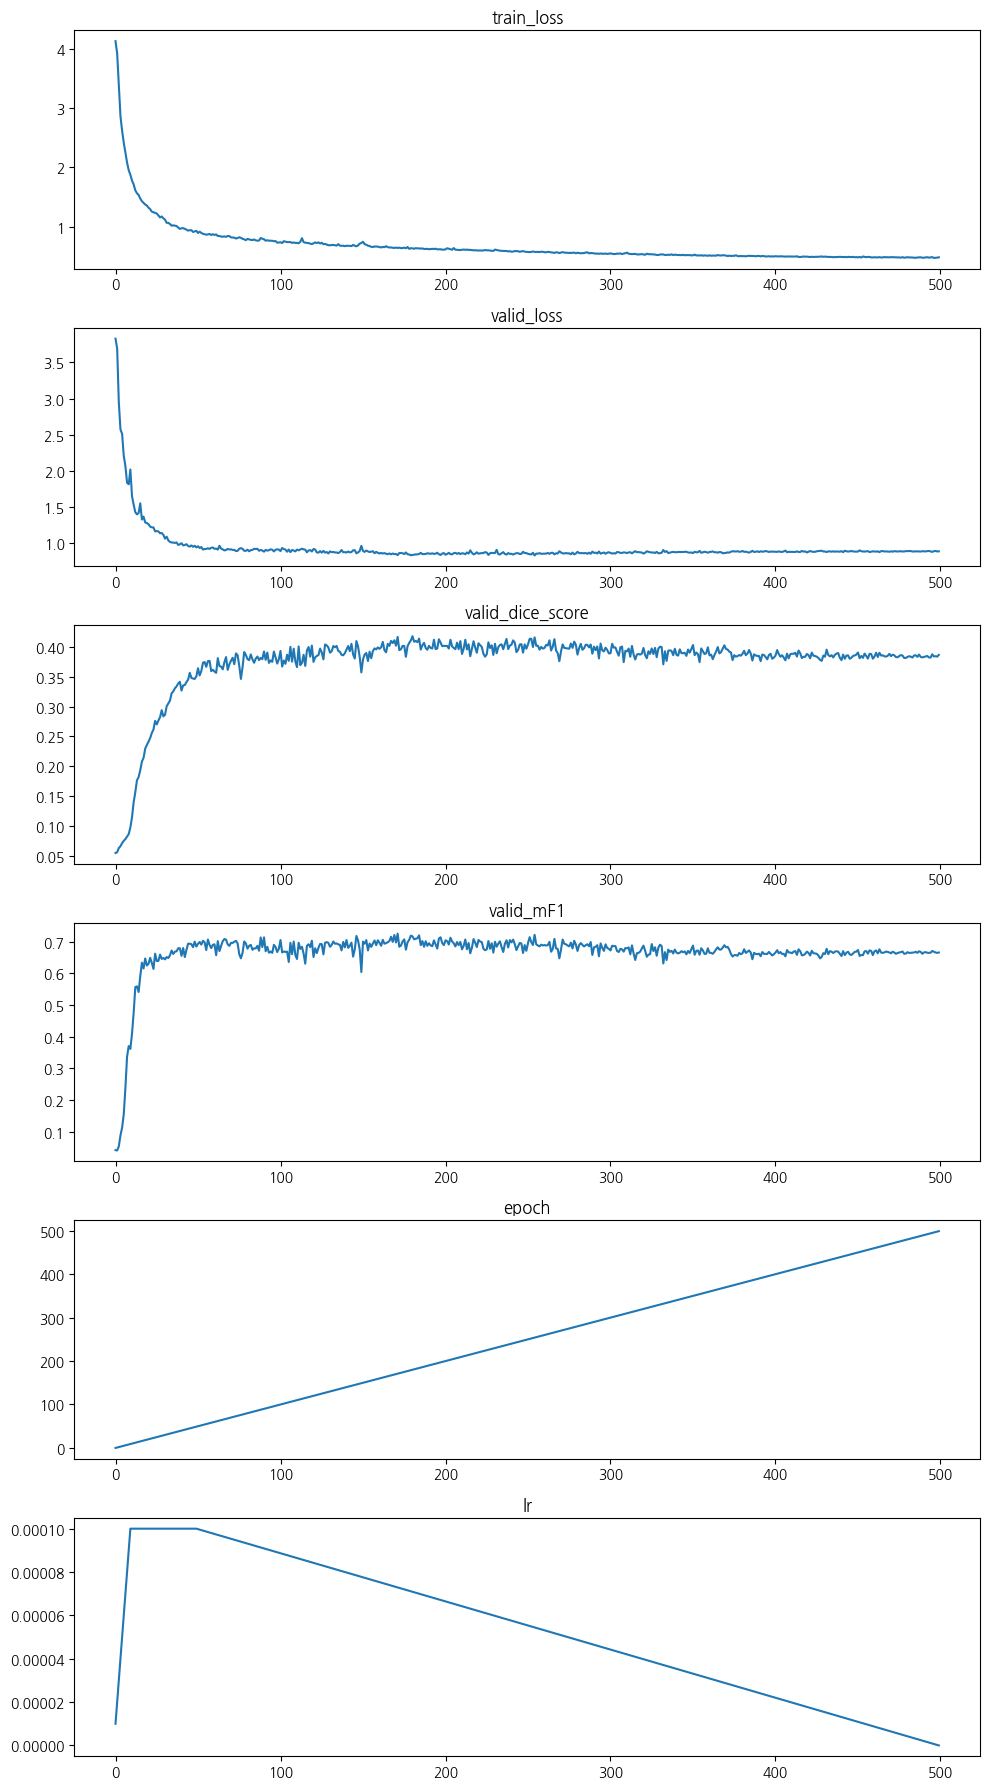

In [13]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230725_Cell_MaxViT_UNet_MTL_Cross_Conv_CLAHE/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_Map_CLAHE

###########################################################
Metric  =  train_loss
Argsort =  [477 499 497 486 494]
Value   =  [0.4485445 0.4496282 0.4504369 0.4510287 0.4517537]
###########################################################
Metric  =  valid_loss
Argsort =  [175 177 208 172 171]
Value   =  [0.8564076 0.8601082 0.8628861 0.8638429 0.8652402]
###########################################################
Metric  =  valid_dice_score
Argsort =  [ 92 227 143 177 119]
Value   =  [0.4057133 0.4055863 0.4032364 0.4031879 0.4031495]
###########################################################
Metric  =  valid_mF1
Argsort =  [102 208 143 177 119]
Value   =  [0.6971  0.6969  0.6965  0.6949  0.69485]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


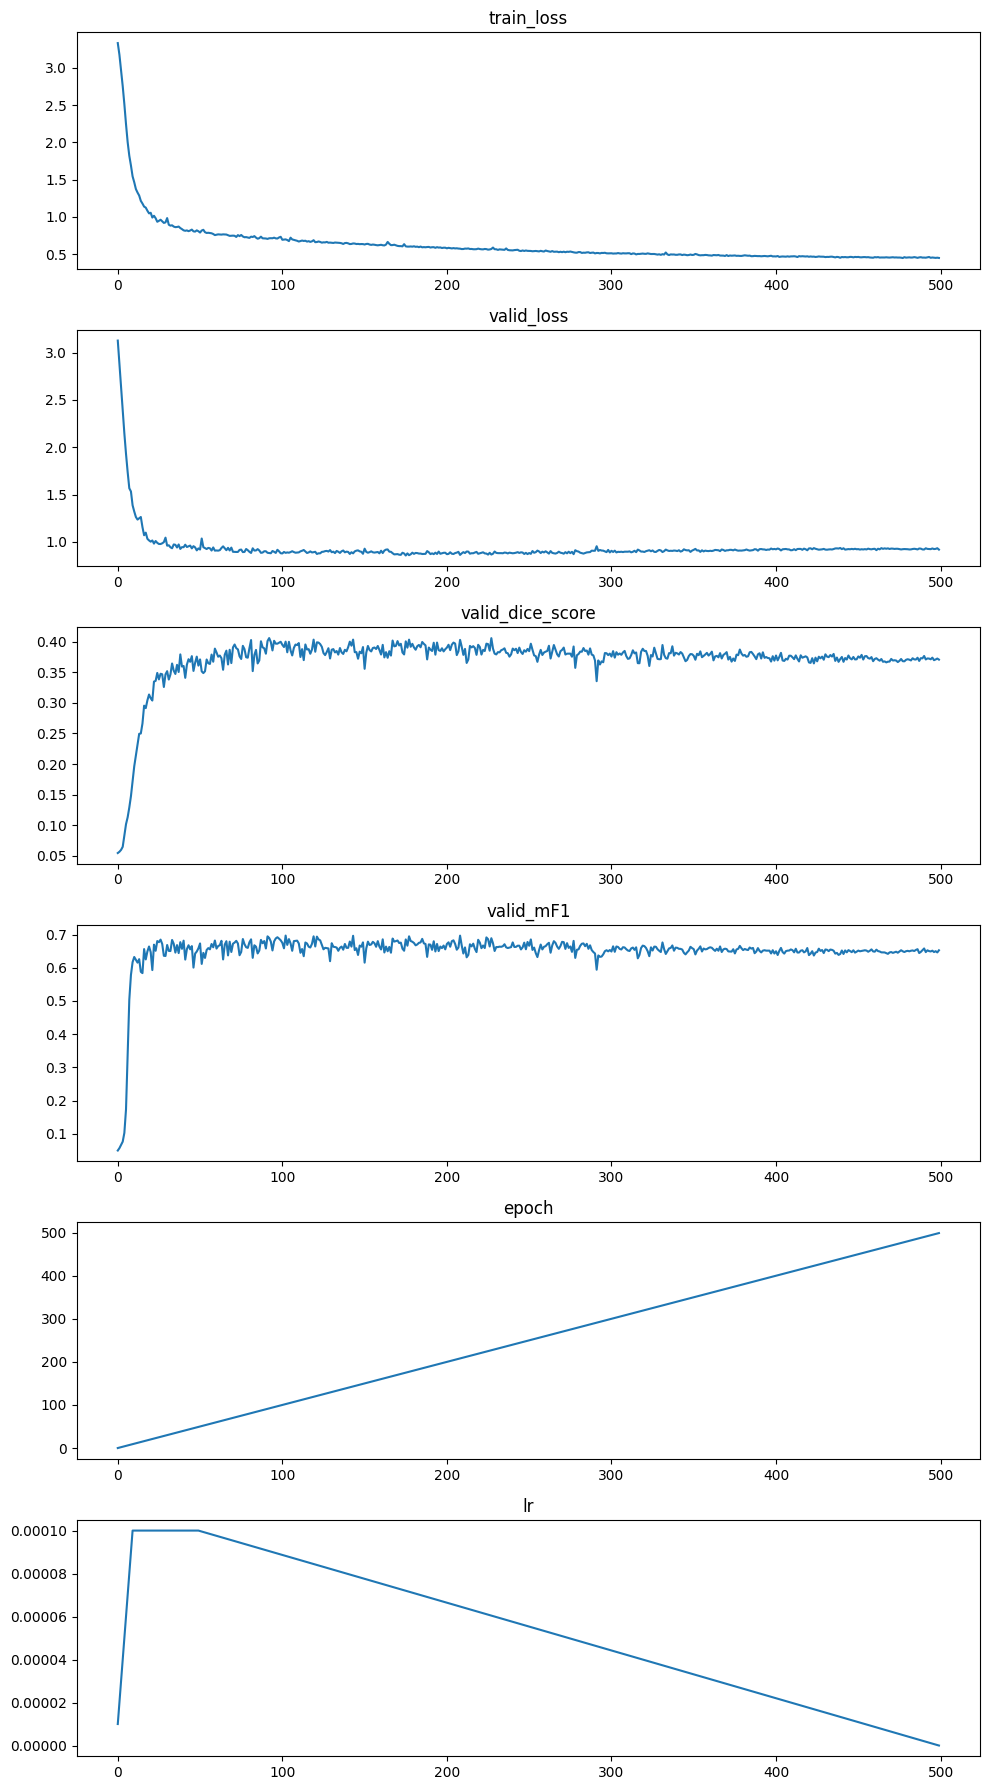

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230725_Cell_MaxViT_UNet_MTL_Cross_Map_CLAHE/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_CLAHE_Focal

In [ ]:
Metric  =  valid_mF1
Argsort =  [61 32 39 44 82]
Value   =  [0.72975 0.7264  0.72335 0.72165 0.7199 ]
###########################################################
Metric  =  epoch
Argsort =  [106 105 104 103 102]
Value   =  [106 105 104 103 102]

###########################################################
Metric  =  train_loss
Argsort =  [ 99  97  98 104  96]
Value   =  [748.7879344 749.5624282 749.5794895 753.0698646 790.8729128]
###########################################################
Metric  =  valid_loss
Argsort =  [66 62 48 82 85]
Value   =  [3079.9668648 3108.0155194 3184.2524693 3200.4637812 3221.1397669]
###########################################################
Metric  =  valid_dice_score
Argsort =  [ 87  82 106  55  44]
Value   =  [0.3000724 0.2991856 0.2949214 0.2926846 0.2925656]
###########################################################
Metric  =  valid_mF1
Argsort =  [61 32 39 44 82]
Value   =  [0.72975 0.7264  0.72335 0.72165 0.7199 ]
###########################################################
Metric  =  epoch
Argsort =  [106 105 104 103 102]
Value   =  [106 105 104 103 102]
###########################################################
Metric  =  lr
Argsort =  [ 9 40 32 33 34]
Value   =  [0.0001 0.0001 0.0001 

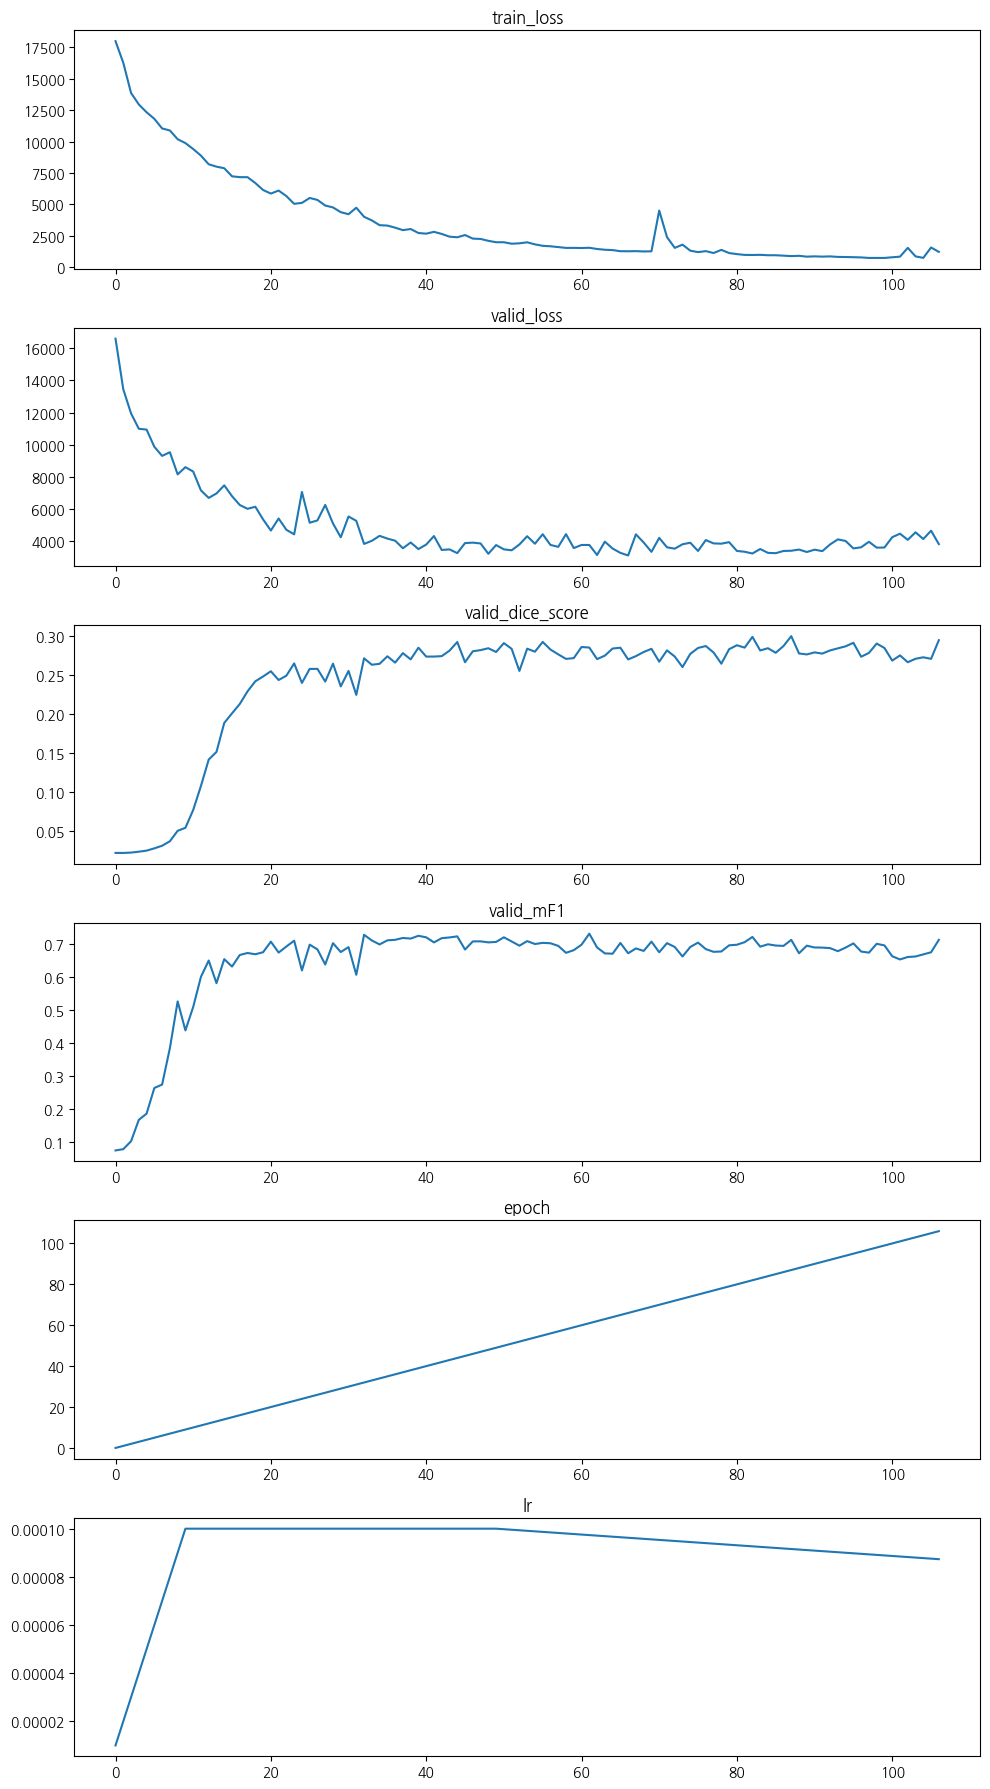

In [41]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230803_Cell_MaxViT_UNet_MTL_DET_SEG_REC_POI/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_Conv_CLAHE_Focal

###########################################################
Metric  =  train_loss
Argsort =  [496 497 485 476 478]
Value   =  [0.4427415 0.4431372 0.4452497 0.4461079 0.4461309]
###########################################################
Metric  =  valid_loss
Argsort =  [240  82 226 125 171]
Value   =  [0.8412331 0.8483229 0.8510017 0.8568306 0.8597481]
###########################################################
Metric  =  valid_dice_score
Argsort =  [184 139 271 274 355]
Value   =  [0.4197764 0.4191232 0.4179303 0.4164342 0.4154508]
###########################################################
Metric  =  valid_mF1
Argsort =  [ 82 271  49 125  98]
Value   =  [0.7145  0.7114  0.71055 0.7094  0.70915]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


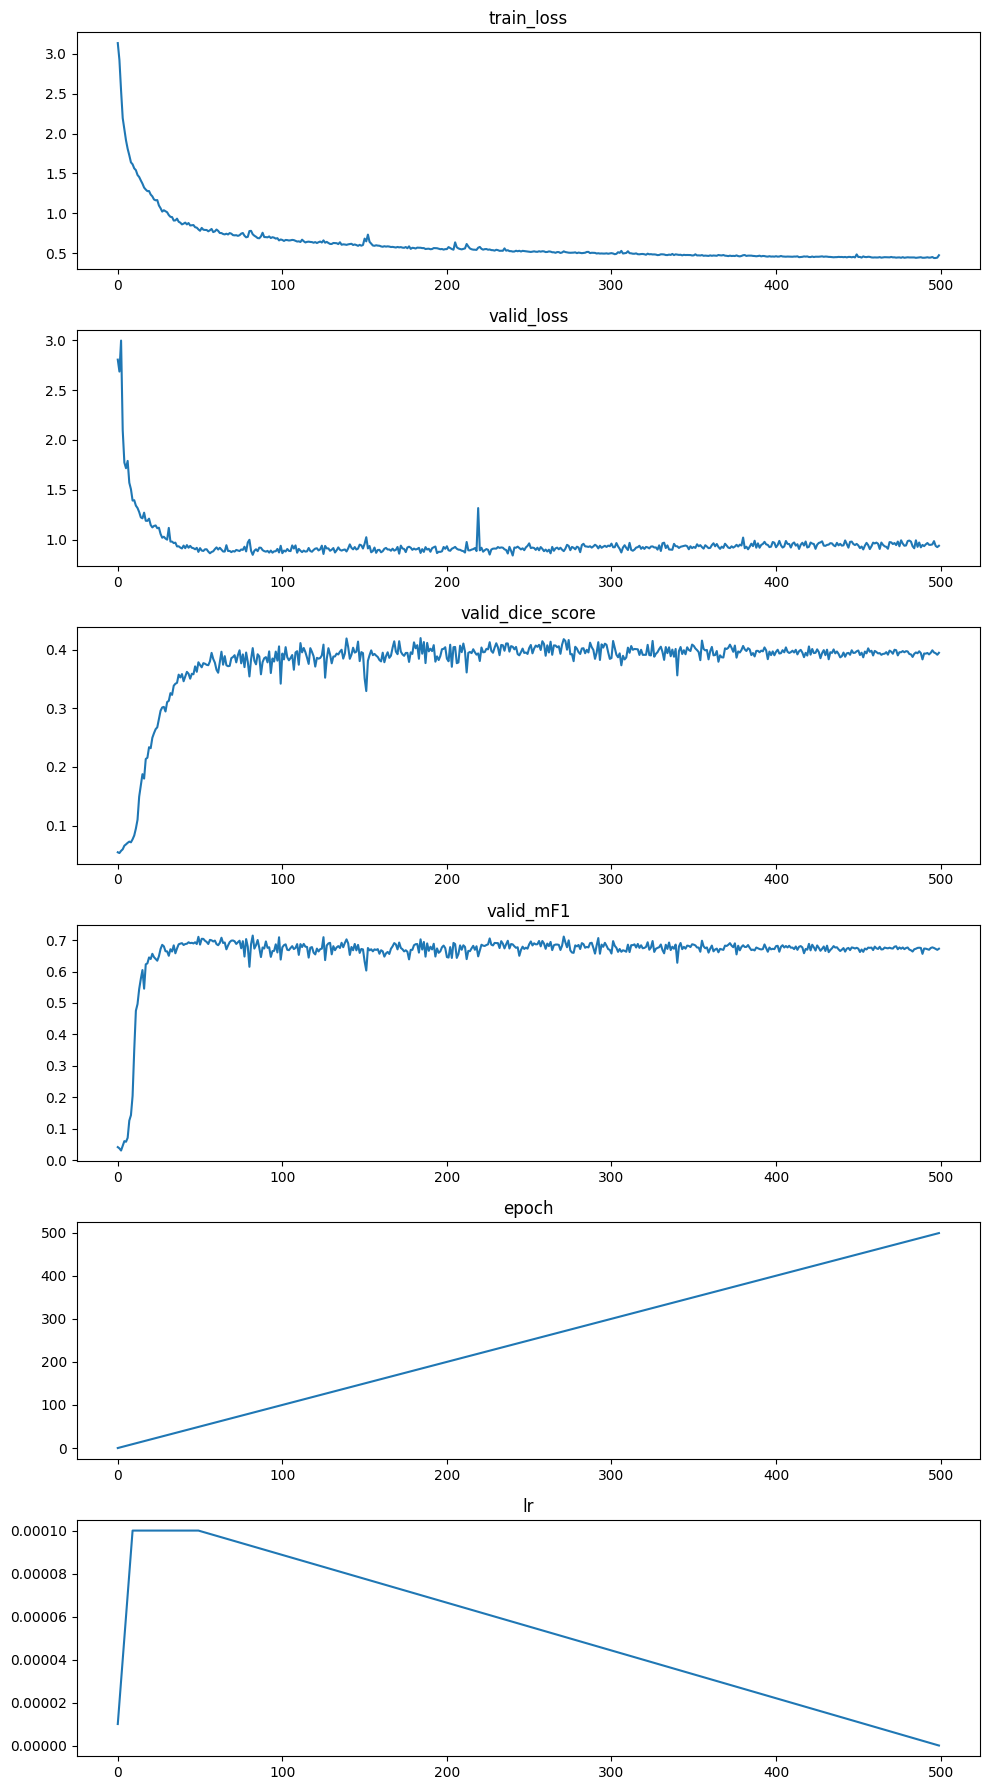

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230725_Cell_MaxViT_UNet_MTL_Cross_Conv_CLAHE_Focal/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


In [57]:
pwd

'/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/Notebook'

- ## 230727_Cell_MaxViT_UNet_MTL_Cross_Conv_Point_CLAHE_Focal

###########################################################
Metric  =  train_loss
Argsort =  [110 111 109 108 112]
Value   =  [30899.9267259 31019.6417481 31519.0900925 31620.6353796 32024.8891409]
###########################################################
Metric  =  valid_loss
Argsort =  [ 67 111 112 113 106]
Value   =  [94483.4633777 94598.7645225 94602.8409744 95770.5147813 98946.9948325]
###########################################################
Metric  =  valid_dice_score
Argsort =  [ 87  75  92  72 105]
Value   =  [0.3107694 0.3090526 0.3066826 0.3046073 0.3038979]
###########################################################
Metric  =  valid_mF1
Argsort =  [105 104 106 111 112]
Value   =  [0.7643 0.7541 0.7531 0.7529 0.7529]
###########################################################
Metric  =  epoch
Argsort =  [113 112 111 110 109]
Value   =  [114 113 112 111 110]
###########################################################
Metric  =  lr
Argsort =  [ 9 40 32 33 34]
Value   =  [0

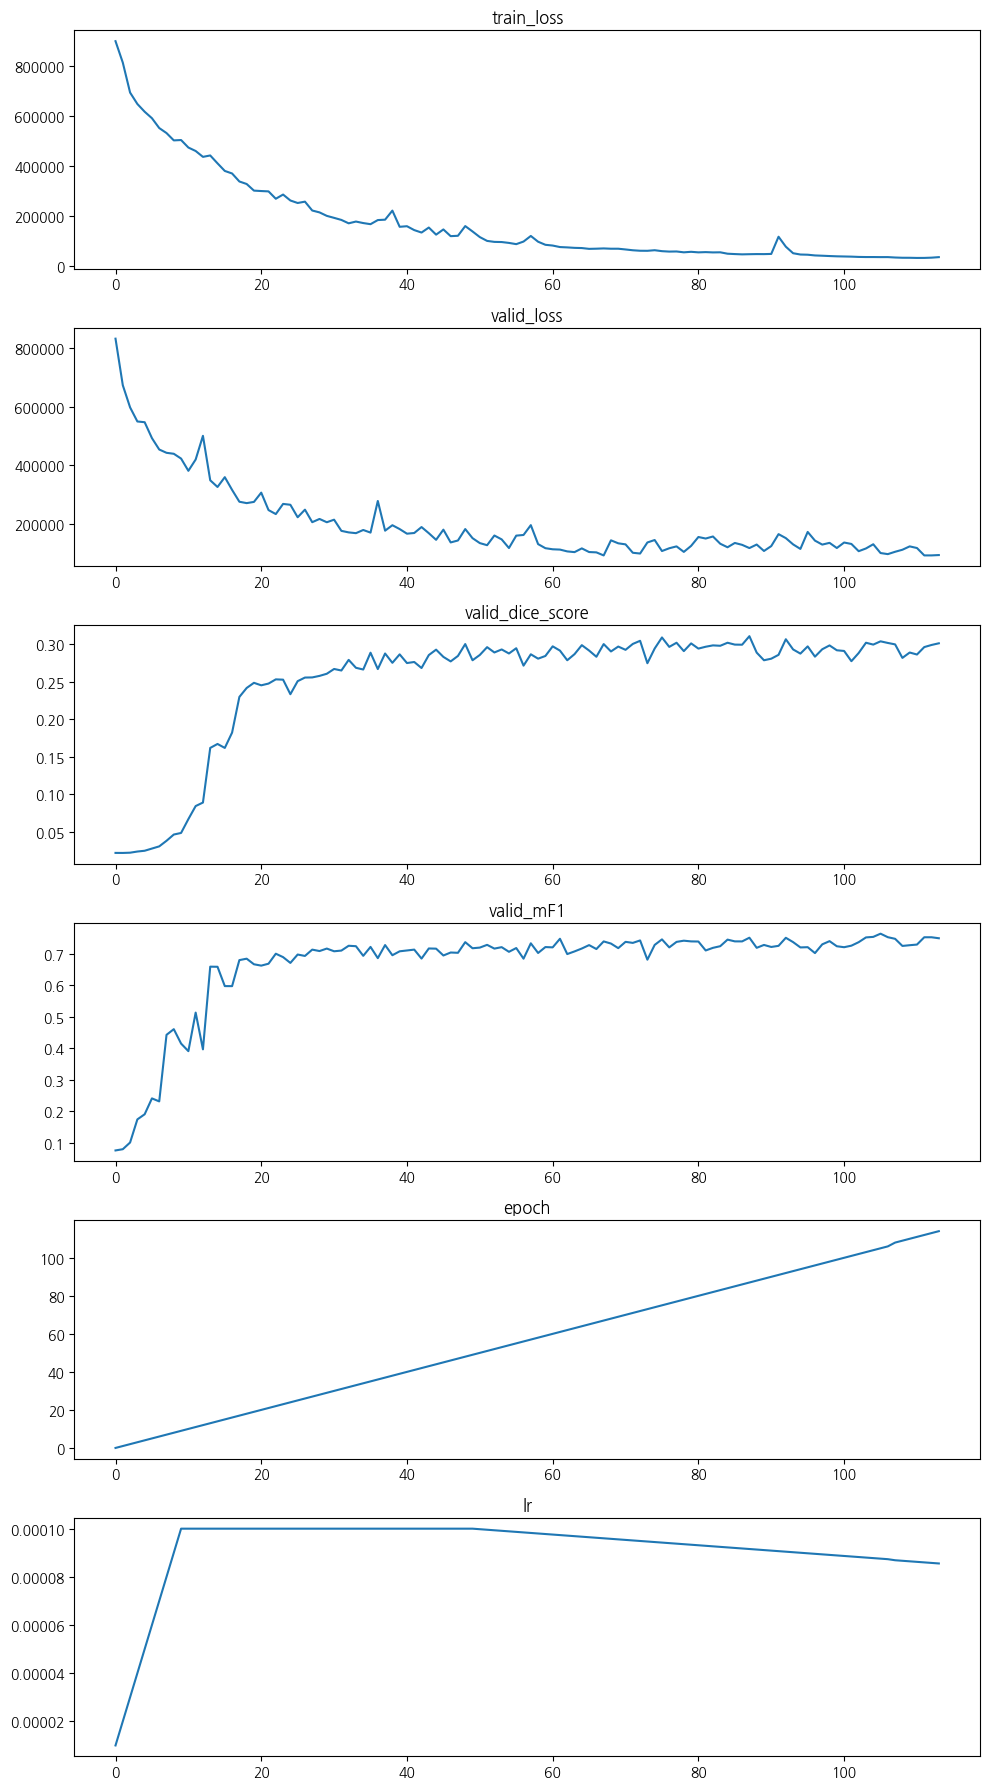

In [56]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230803_Cell_MaxViT_UNet_MTL_DET_SEG_REC_POI_loss_weight/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


# 230727_Cell_MaxViT_DeepLabV3_MTL_Cross_Conv_Point_CLAHE_Focal_remove_point

In [ ]:
Metric  =  valid_mF1
Argsort =  [32 39 44 50 40]
Value   =  [0.7264  0.72335 0.72165 0.7188  0.71865]

In [ ]:
Metric  =  valid_mF1
Argsort =  [46 36 30 53 45]
Value   =  [0.73315 0.7286  0.728   0.7268  0.72555]

###########################################################
Metric  =  train_loss
Argsort =  [101 100  99  98  97]
Value   =  [29366.398502  29887.0083952 30132.1893771 30633.4027284 30755.0474692]
###########################################################
Metric  =  valid_loss
Argsort =  [91 97 96 99 98]
Value   =  [35161.7523066 36811.5672026 37569.571441  37781.0174885 37851.7097862]
###########################################################
Metric  =  valid_dice_score
Argsort =  [100  89  93  94 101]
Value   =  [0.2833693 0.2831162 0.2810975 0.2779907 0.277603 ]
###########################################################
Metric  =  valid_mF1
Argsort =  [82 96 94 91 89]
Value   =  [0.7207  0.71775 0.71135 0.71    0.70865]
###########################################################
Metric  =  epoch
Argsort =  [101 100  99  98  97]
Value   =  [101 100  99  98  97]
###########################################################
Metric  =  lr
Argsort =  [ 9 29 31 32 33]
Value   =  [0.0001

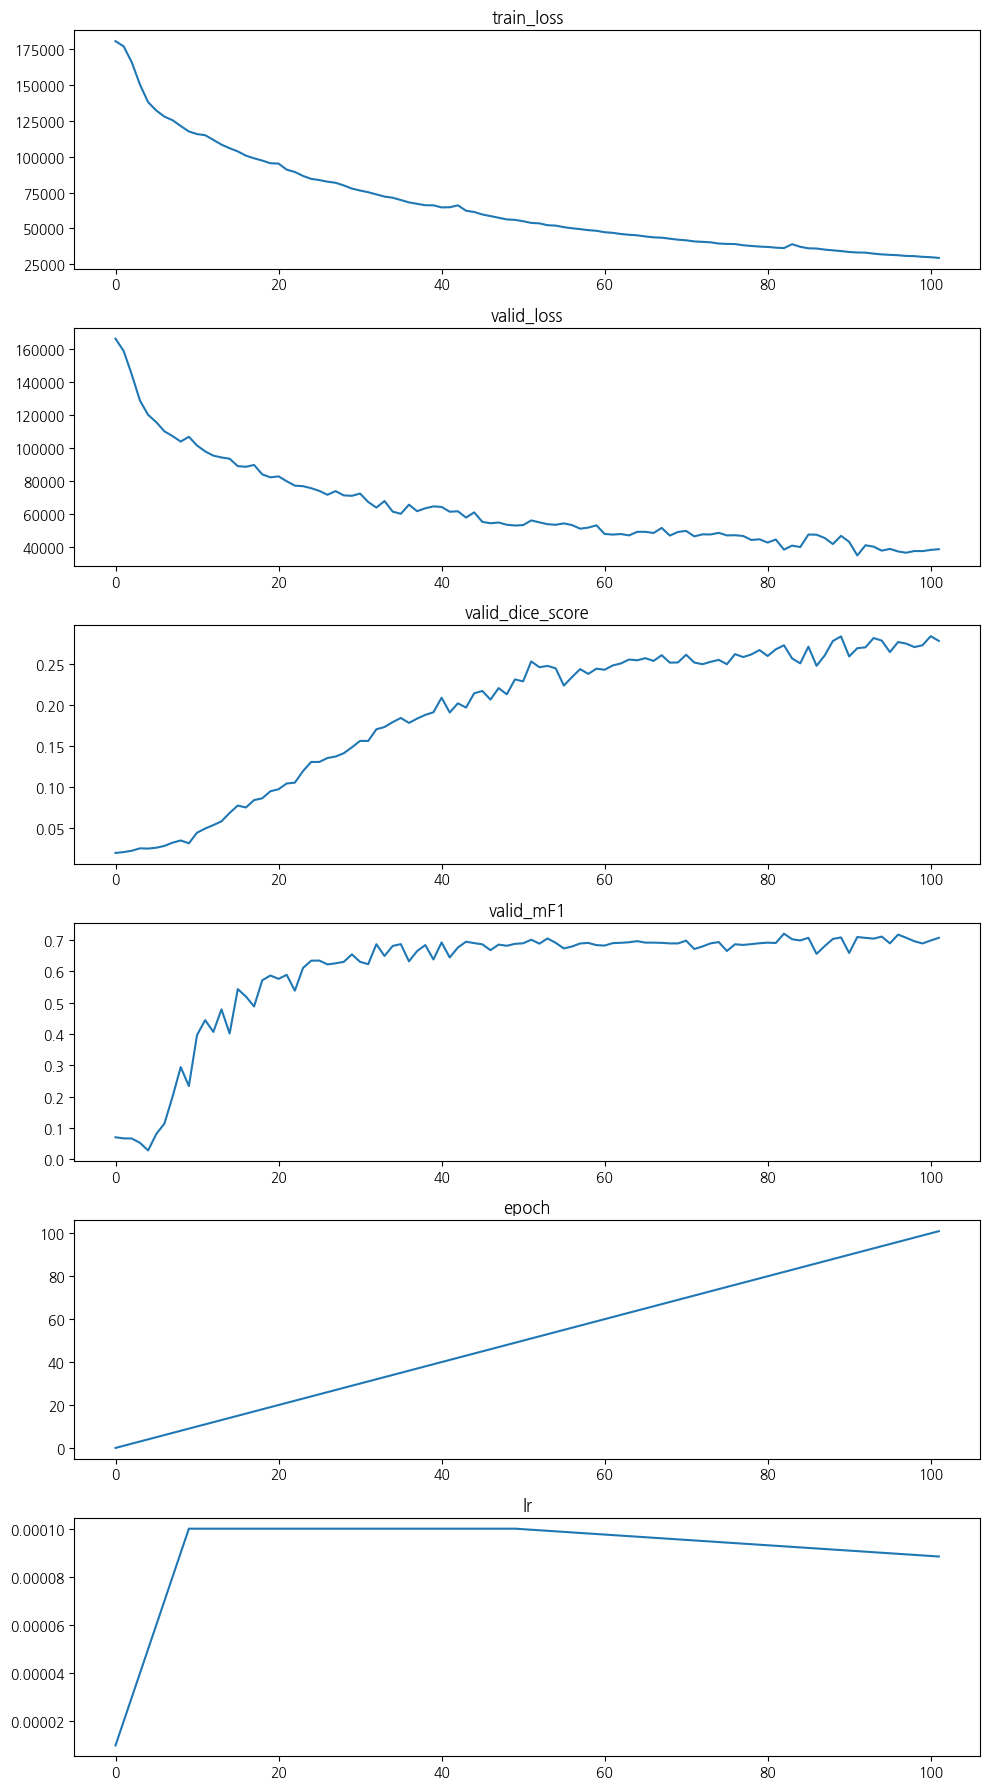

In [10]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230803_Cell_MaxViT_UNet_MTL_DET_SEG_REC_POI_loss_weight_Real/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


In [22]:
import timm

encoder = timm.create_model('maxvit_xlarge_tf_512.in21k_ft_in1k', pretrained=True, features_only=True) # Xlarge

In [36]:
encoder.stages_3.blocks[1]

MaxxVitBlock(
  (conv): MbConvBlock(
    (shortcut): Identity()
    (pre_norm): BatchNormAct2d(
      1536, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): Identity()
    )
    (down): Identity()
    (conv1_1x1): Conv2d(1536, 6144, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (norm1): BatchNormAct2d(
      6144, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): GELUTanh()
    )
    (conv2_kxk): Conv2d(6144, 6144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=6144, bias=False)
    (norm2): BatchNormAct2d(
      6144, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): GELUTanh()
    )
    (se): SEModule(
      (fc1): Conv2d(6144, 384, kernel_size=(1, 1), stride=(1, 1))
      (bn): Identity()
      (act): SiLU(inplace=True)
      (fc2): Conv2d(384, 6144, kernel_size=(1, 1), stride=(1, 1))
      (gate): Sigmoid()
    )
 

# 가볍게 저장

In [ ]:
/workspace/sunggu/0.Challenge/MICCAI2023_LDCTIQA/LDCTIQAG_reference_docker/model_weights/MaxViT_UNet_CLS_REC_Skip_epoch_103_checkpoint.pth

In [31]:
import torch
model = torch.load('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/ocelot23algo/user/checkpoints/epoch_105_checkpoint.pth')
torch.save({'model_state_dict': model['model_state_dict']}, '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/ocelot23algo/user/checkpoints/epoch_105_checkpoint.pth')

# Greedy Soup

In [70]:
cd /workspace/sunggu/0.Challenge/MICCAI2023_LDCTIQA

/workspace/sunggu/0.Challenge/MICCAI2023_LDCTIQA


In [71]:
!nvidia-smi
import os
os.environ["CUDA_VISIBLE_DEVICES"]  =  '3'  

Thu Jul 27 10:30:49 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:1B:00.0 Off |                  Off |
| 30%   28C    P8              18W / 300W |   3606MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# https://github.com/mlfoundations/model-soups/blob/main/main.py

In [24]:
# image 형태 B, C, H, W
import torch
import torch.nn.functional as F

def rotate90(image):
    theta = torch.tensor([
        [0, -1, 0],
        [1, 0, 0]
    ], dtype=torch.float).to('cuda')

    grid     = F.affine_grid(theta.unsqueeze(0), image.size())
    image_90 = F.grid_sample(image, grid)
    return image_90

def vertical_flip(image):
    return image.flip(2)

def horizontal_flip(image):
    return image.flip(3)

In [ ]:
from dataloaders import get_dataloader
from losses import get_loss
from models import get_model
import numpy as np

root = '/workspace/sunggu/0.Challenge/MICCAI2023_LDCTIQA/checkpoints'

# Model
model = get_model(name='Window_EfficientNetB7')
# Loss
criterion = get_loss(name='l2_loss')
# Dataset
valid_loader = get_dataloader(name='ldctiqa_original', mode='valid', batch_size=1, num_workers=4)

# Resume
sorted_models = [root + '/230606_Window_EfficientNetB7/epoch_69_checkpoint.pth', # 옵티마이저,, 엘알,, 어그멘테이션 
                 root + '/230606_Window_EfficientNetB7/epoch_70_checkpoint.pth',
                 root + '/230606_Window_EfficientNetB7/epoch_342_checkpoint.pth',
                 root + '/230606_Window_EfficientNetB7/epoch_62_checkpoint.pth',
                 root + '/230606_Window_EfficientNetB7/epoch_362_checkpoint.pth']

# Start the soup by using the first ingredient.
greedy_soup_ingredients = [sorted_models[0]]
greedy_soup_params      = torch.load(sorted_models[0])['model_state_dict']
greedy_soup_params      = {k.replace('module.', ''): v for k, v in greedy_soup_params.items() if k != 'n_averaged'} # filter out unnecessary keys in SWA model

# Run the potential greedy soup on the held-out val set.
model.load_state_dict(greedy_soup_params)
model.to('cuda')
best_val_metric_so_far = valid_loop_fn(valid_loader, model, criterion, device='cuda')['Overall']
print('Best score ==> ' + str(best_val_metric_so_far))

# Now, iterate through all models and consider adding them to the greedy soup.
for i in range(1, len(sorted_models)):
    print(f'Testing model {i} of {len(sorted_models)}')

    # Get the potential greedy soup, which consists of the greedy soup with the new model added.
    new_ingredient_params = torch.load(sorted_models[i])['model_state_dict']
    num_ingredients = len(greedy_soup_ingredients)
    print("num_ingredients = ", num_ingredients)
    potential_greedy_soup_params = {
        k : greedy_soup_params[k].clone() * (num_ingredients / (num_ingredients + 1.)) + new_ingredient_params[k].clone() * (1. / (num_ingredients + 1))
        for k in new_ingredient_params
    }

    # Run the potential greedy soup on the held-out val set.
    model.load_state_dict(potential_greedy_soup_params)
    model.to('cuda')   
    
    held_out_val_metric = valid_loop_fn(valid_loader, model, criterion, device='cuda')['Overall']
    # held_out_val_metric = test_model_on_dataset(model, held_out_val_set)

    # If accuracy on the held-out val set increases, add the new model to the greedy soup.
    print(f'Potential greedy soup val metric ==> [{held_out_val_metric}], Best so far ==> [{best_val_metric_so_far}].')
    if held_out_val_metric > best_val_metric_so_far:
        greedy_soup_ingredients.append(sorted_models[i])
        best_val_metric_so_far = held_out_val_metric
        greedy_soup_params     = potential_greedy_soup_params
        print(f'Adding to soup. New soup is {greedy_soup_ingredients}')

# Finally, evaluate the greedy soup.
model.load_state_dict(greedy_soup_params)
model.to('cuda')   
held_out_val_metric = valid_loop_fn(valid_loader, model, criterion, device='cuda')
print('==> Averaged [Valid] stats: ' + str(held_out_val_metric))
print("Here is the Soup ingredients: ", greedy_soup_ingredients)

# save the greedy_soup_params
torch.save({'model_state_dict': greedy_soup_params}, root+'/230711_Window_MaxViT_Base/Model_Soup_checkpoint.pth')


# Test External

In [1]:
cd /workspace/sunggu/0.Challenge/MICCAI2023_OCELOT

/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT


In [2]:
!nvidia-smi
import os
os.environ["CUDA_VISIBLE_DEVICES"]  =  '2'  

Fri Aug  4 20:02:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:1B:00.0 Off |                    0 |
| N/A   51C    P0    53W / 250W |   7560MiB / 22919MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   

In [3]:
from scipy.ndimage.measurements import label
from skimage.morphology import binary_dilation, binary_erosion, disk, remove_small_objects, remove_small_holes

# min_size=10, min_hole=30

def remove_small_clusters(preds):
    masks = preds.argmax(dim=1).squeeze().numpy() # B, H, W

    masks = [(masks == v) for v in [0, 1, 2]]
    masks = np.stack(masks, axis=0)
    
    masks[1] = remove_small_objects(masks[1], min_size=10)
    masks[1] = remove_small_holes(masks[1], area_threshold=30)    

    masks[2] = remove_small_objects(masks[2], min_size=10)
    masks[2] = remove_small_holes(masks[2], area_threshold=30)        

    preds[0, 1, :, :] = preds[0, 1, :, :] * masks[1]
    preds[0, 2, :, :] = preds[0, 2, :, :] * masks[2]

    bg = np.ones_like(masks[1]) ^ np.logical_or(masks[1], masks[2])

    preds[0, 0, :, :] = preds[0, 0, :, :] * bg

    return preds


/tmp/ipykernel_80205/1959900917.py:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [7]:
from dataloaders import get_dataloader
from losses import get_loss
from models import get_model
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import metrics


import torch
import math
import utils
from tqdm import tqdm
import albumentations as A
import pandas as pd

tta = False

# Setting...!
fn_denorm  = lambda x: (x * 0.5) + 0.5
fn_tonumpy = lambda x: x.cpu().detach().numpy()

root = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints'
save_dir = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/predictions/TEST'
# Model
model = get_model(name='Cell_MaxViT_UNet_MTL_DET_SEG_REC_POI_Original')
# Loss
criterion = get_loss(name='cell_det_seg_rec_poi_loss')
# Dataset
valid_loader = get_dataloader(name='ocelot_cell_mtl_det_seg_rec_poi', mode='valid', batch_size=1, num_workers=4)

greedy_soup_params = torch.load(root + '/230803_Cell_MaxViT_UNet_MTL_DET_SEG_REC_POI_loss_weight/epoch_105_checkpoint.pth')['model_state_dict']
greedy_soup_params = {k.replace('module.', ''): v for k, v in greedy_soup_params.items() if k != 'n_averaged'} # filter out unnecessary keys in SWA model

# Run the potential greedy soup on the held-out val set.
model.load_state_dict(greedy_soup_params)
model.to('cuda')
device='cuda'


model.eval()
metric_logger  = utils.AverageMeter()
epoch_iterator = tqdm(valid_loader, desc="Validating (X / X Steps) (loss=X.X)", dynamic_ncols=True, total=len(valid_loader))

pred_all = [] # must be 1d list or array
gt_all   = [] # must be 1d list or array
for step, batch_data in enumerate(epoch_iterator):

    image, tissue_segmap, cell_gt, point_gt, gt_point_path = batch_data
    image, tissue_segmap, cell_gt, point_gt = image.to(device), tissue_segmap.to(device), cell_gt.to(device), point_gt.to(device)

    with torch.no_grad():
        logit_det, logit_seg, logit_rec, logit_poi = model(image)
    loss = criterion(logit_det, logit_seg, logit_rec, logit_poi, cell_gt, tissue_segmap, image, point_gt)
    loss_value = loss.item()

    if not math.isfinite(loss_value):
        print("Loss is {}, stopping training".format(loss_value))

    metric_logger.update(key='valid_loss', value=loss_value, n=image.shape[0])
    epoch_iterator.set_description("Validating: Epochs (%d / %d Steps), (valid_loss=%2.5f)" % (step, len(valid_loader), loss_value))

    print("step == ", step)
    print("gt_point_path == ", gt_point_path)
    print("logit_point = ", logit_poi)
    print("point_gt = ", point_gt)

    # post-processing
    preds = logit_det.softmax(dim=1).detach().cpu()
    gts   = cell_gt.detach().cpu()
    
    # preds = remove_small_clusters(preds)

    # Metric Calculation
    score = metrics.multiclass_dice_score(y_true=gts.squeeze().numpy(), y_pred=preds.squeeze().numpy())
    metric_logger.update(key='valid_dice_score', value=score, n=image.shape[0])

    resize_preds = F.interpolate(preds, size=(1024, 1024), mode='bilinear', align_corners=True).squeeze().numpy()
    predicted_cells = metrics.find_cells(resize_preds)

    try:
        gt_cells = pd.read_csv(gt_point_path[0], header=None).values
    except:
        gt_cells = np.zeros(shape=(0, 3))

    pred_all.append(predicted_cells)
    gt_all.append(gt_cells)

    # PNG Save
    image_png = (fn_tonumpy(fn_denorm(image)).squeeze()*255).astype('uint8') # (1, 3, 1024, 1024)
    preds_png = preds.squeeze().argmax(dim=0).numpy() # (1024, 1024)
    image_png[0][preds_png==1] = 0
    image_png[1][preds_png==1] = 255
    image_png[2][preds_png==1] = 0

    image_png[0][preds_png==2] = 0
    image_png[1][preds_png==2] = 0
    image_png[2][preds_png==2] = 255
    plt.imsave(save_dir+'/'+gt_point_path[0].split('/')[-1].split('.')[0]+'_pred.png', image_png.transpose(1, 2, 0))
    
    image_png = (fn_tonumpy(fn_denorm(image)).squeeze()*255).astype('uint8') # (1, 3, 1024, 1024)
    gts_png   = gts.squeeze().argmax(dim=0).numpy() # (1024, 1024)
    image_png[0][gts_png==1] = 0
    image_png[1][gts_png==1] = 255
    image_png[2][gts_png==1] = 0

    image_png[0][gts_png==2] = 0
    image_png[1][gts_png==2] = 0
    image_png[2][gts_png==2] = 255
    plt.imsave(save_dir+'/'+gt_point_path[0].split('/')[-1].split('.')[0]+'_gt.png', image_png.transpose(1, 2, 0))

    image_png = (fn_tonumpy(fn_denorm(image)).squeeze()*255).astype('uint8') # (1, 3, 1024, 1024)
    tissue_segmap = tissue_segmap.detach().cpu().squeeze().numpy() # (1024, 1024)
    image_png[0][tissue_segmap==1] = 0
    image_png[1][tissue_segmap==1] = 0
    image_png[2][tissue_segmap==1] = 255
    plt.imsave(save_dir+'/'+gt_point_path[0].split('/')[-1].split('.')[0]+'_tissue_segmap_gt.png', image_png.transpose(1, 2, 0))

    image_png = (fn_tonumpy(fn_denorm(image)).squeeze()*255).astype('uint8') # (1, 3, 1024, 1024)
    logit_seg = torch.sigmoid(logit_seg).detach().cpu().squeeze().round().numpy() # (1024, 1024)
    image_png[0][logit_seg==1] = 0
    image_png[1][logit_seg==1] = 0
    image_png[2][logit_seg==1] = 255
    plt.imsave(save_dir+'/'+gt_point_path[0].split('/')[-1].split('.')[0]+'_tissue_segmap_pred.png', image_png.transpose(1, 2, 0))
    
# Metric Calculation
mf1 = metrics.mf1_metric(pred_all, gt_all)
metric_logger.update(key='valid_mF1', value=mf1, n=image.shape[0])

print({k: round(v, 7) for k, v in metric_logger.average().items()})


Number of Learnable Params: 507916886
Valid [Total] number =  79


Validating: Epochs (0 / 79 Steps), (valid_loss=2969.93164):   0%|          | 0/79 [00:01<?, ?it/s]

step ==  0
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/004.csv',)
logit_point =  tensor([[  4.1469, 201.0143]], device='cuda:0')
point_gt =  tensor([[  0., 177.]], device='cuda:0')


Validating: Epochs (1 / 79 Steps), (valid_loss=1439.21130):   1%|▏         | 1/79 [00:02<02:17,  1.77s/it]

step ==  1
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/013.csv',)
logit_point =  tensor([[  7.3324, 201.7040]], device='cuda:0')
point_gt =  tensor([[  0., 217.]], device='cuda:0')


Validating: Epochs (2 / 79 Steps), (valid_loss=7174.94971):   3%|▎         | 2/79 [00:02<01:32,  1.20s/it]

step ==  2
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/014.csv',)
logit_point =  tensor([[58.5367, -6.0861]], device='cuda:0')
point_gt =  tensor([[90., 15.]], device='cuda:0')


Validating: Epochs (3 / 79 Steps), (valid_loss=9894.73242):   4%|▍         | 3/79 [00:03<01:26,  1.13s/it]

step ==  3
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/016.csv',)
logit_point =  tensor([[ 28.6435, 138.5373]], device='cuda:0')
point_gt =  tensor([[ 30., 183.]], device='cuda:0')


Validating: Epochs (4 / 79 Steps), (valid_loss=7672.45020):   5%|▌         | 4/79 [00:04<01:15,  1.00s/it]

step ==  4
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/017.csv',)
logit_point =  tensor([[49.8464,  1.1759]], device='cuda:0')
point_gt =  tensor([[89.,  0.]], device='cuda:0')


Validating: Epochs (5 / 79 Steps), (valid_loss=45.01276):   6%|▋         | 5/79 [00:05<01:13,  1.01it/s]  

step ==  5
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/023.csv',)
logit_point =  tensor([[ 18.3409, 245.3244]], device='cuda:0')
point_gt =  tensor([[ 21., 244.]], device='cuda:0')


Validating: Epochs (6 / 79 Steps), (valid_loss=4275.63623):   8%|▊         | 6/79 [00:08<01:47,  1.47s/it]

step ==  6
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/024.csv',)
logit_point =  tensor([[ 11.5128, 106.2354]], device='cuda:0')
point_gt =  tensor([[11., 77.]], device='cuda:0')


Validating: Epochs (7 / 79 Steps), (valid_loss=1968.55249):   9%|▉         | 7/79 [00:08<01:30,  1.25s/it]

step ==  7
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/036.csv',)
logit_point =  tensor([[23.8380, 64.9214]], device='cuda:0')
point_gt =  tensor([[ 4., 65.]], device='cuda:0')


Validating: Epochs (8 / 79 Steps), (valid_loss=3026.84790):  10%|█         | 8/79 [00:09<01:20,  1.14s/it]

step ==  8
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/041.csv',)
logit_point =  tensor([[ 40.6928, 178.3010]], device='cuda:0')
point_gt =  tensor([[ 53., 157.]], device='cuda:0')


Validating: Epochs (9 / 79 Steps), (valid_loss=1796.38892):  11%|█▏        | 9/79 [00:10<01:12,  1.03s/it]

step ==  9
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/045.csv',)
logit_point =  tensor([[13.4173, 60.0544]], device='cuda:0')
point_gt =  tensor([[13., 79.]], device='cuda:0')


Validating: Epochs (10 / 79 Steps), (valid_loss=8050.13037):  13%|█▎        | 10/79 [00:11<01:06,  1.04it/s]

step ==  10
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/048.csv',)
logit_point =  tensor([[ 41.5839, 148.4645]], device='cuda:0')
point_gt =  tensor([[ 53., 110.]], device='cuda:0')


Validating: Epochs (11 / 79 Steps), (valid_loss=936.27454):  14%|█▍        | 11/79 [00:12<01:03,  1.07it/s] 

step ==  11
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/050.csv',)
logit_point =  tensor([[ 41.4435, 115.0614]], device='cuda:0')
point_gt =  tensor([[ 35., 103.]], device='cuda:0')


Validating: Epochs (12 / 79 Steps), (valid_loss=2329.13647):  15%|█▌        | 12/79 [00:13<01:02,  1.07it/s]

step ==  12
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/052.csv',)
logit_point =  tensor([[ 24.5097, 155.0508]], device='cuda:0')
point_gt =  tensor([[ 46., 157.]], device='cuda:0')


Validating: Epochs (13 / 79 Steps), (valid_loss=435.52429):  16%|█▋        | 13/79 [00:14<01:00,  1.09it/s] 

step ==  13
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/053.csv',)
logit_point =  tensor([[6.8301, 6.3538]], device='cuda:0')
point_gt =  tensor([[0., 0.]], device='cuda:0')


Validating: Epochs (14 / 79 Steps), (valid_loss=1473.25916):  18%|█▊        | 14/79 [00:15<01:00,  1.08it/s]

step ==  14
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/058.csv',)
logit_point =  tensor([[59.9029, -6.4536]], device='cuda:0')
point_gt =  tensor([[44.,  0.]], device='cuda:0')


Validating: Epochs (15 / 79 Steps), (valid_loss=3932.92432):  19%|█▉        | 15/79 [00:16<00:59,  1.08it/s]

step ==  15
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/064.csv',)
logit_point =  tensor([[ 3.1549, 81.0172]], device='cuda:0')
point_gt =  tensor([[  5., 109.]], device='cuda:0')


Validating: Epochs (16 / 79 Steps), (valid_loss=1091.48413):  20%|██        | 16/79 [00:16<00:55,  1.13it/s]

step ==  16
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/072.csv',)
logit_point =  tensor([[13.8798, 69.9395]], device='cuda:0')
point_gt =  tensor([[21., 57.]], device='cuda:0')


Validating: Epochs (17 / 79 Steps), (valid_loss=15619.28418):  22%|██▏       | 17/79 [00:17<00:55,  1.11it/s]

step ==  17
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/080.csv',)
logit_point =  tensor([[28.2184, 83.3543]], device='cuda:0')
point_gt =  tensor([[ 23., 139.]], device='cuda:0')


Validating: Epochs (18 / 79 Steps), (valid_loss=7027.07715):  23%|██▎       | 18/79 [00:18<00:53,  1.13it/s] 

step ==  18
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/082.csv',)
logit_point =  tensor([[  9.7302, 164.2027]], device='cuda:0')
point_gt =  tensor([[  0., 128.]], device='cuda:0')


Validating: Epochs (19 / 79 Steps), (valid_loss=16285.81836):  24%|██▍       | 19/79 [00:19<00:51,  1.16it/s]

step ==  19
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/084.csv',)
logit_point =  tensor([[92.0316, 11.1633]], device='cuda:0')
point_gt =  tensor([[148.,   0.]], device='cuda:0')


Validating: Epochs (20 / 79 Steps), (valid_loss=3113.44238):  25%|██▌       | 20/79 [00:20<00:54,  1.08it/s] 

step ==  20
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/099.csv',)
logit_point =  tensor([[13.6253, 78.9238]], device='cuda:0')
point_gt =  tensor([[  2., 101.]], device='cuda:0')


Validating: Epochs (21 / 79 Steps), (valid_loss=1115.81494):  27%|██▋       | 21/79 [00:21<00:51,  1.12it/s]

step ==  21
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/102.csv',)
logit_point =  tensor([[21.6903, 93.3215]], device='cuda:0')
point_gt =  tensor([[ 7., 96.]], device='cuda:0')


Validating: Epochs (22 / 79 Steps), (valid_loss=565.86334):  28%|██▊       | 22/79 [00:22<00:49,  1.15it/s] 

step ==  22
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/108.csv',)
logit_point =  tensor([[ 9.8196, 44.9263]], device='cuda:0')
point_gt =  tensor([[ 0., 49.]], device='cuda:0')


Validating: Epochs (23 / 79 Steps), (valid_loss=1175.93970):  29%|██▉       | 23/79 [00:22<00:47,  1.18it/s]

step ==  23
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/111.csv',)
logit_point =  tensor([[18.3508, 60.8523]], device='cuda:0')
point_gt =  tensor([[16., 76.]], device='cuda:0')


Validating: Epochs (24 / 79 Steps), (valid_loss=742.34283):  30%|███       | 24/79 [00:23<00:47,  1.17it/s] 

step ==  24
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/112.csv',)
logit_point =  tensor([[19.3128, 23.8782]], device='cuda:0')
point_gt =  tensor([[22., 12.]], device='cuda:0')


Validating: Epochs (25 / 79 Steps), (valid_loss=344.77463):  32%|███▏      | 25/79 [00:24<00:45,  1.17it/s]

step ==  25
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/113.csv',)
logit_point =  tensor([[18.1968, 57.0773]], device='cuda:0')
point_gt =  tensor([[24., 63.]], device='cuda:0')


Validating: Epochs (26 / 79 Steps), (valid_loss=4710.47070):  33%|███▎      | 26/79 [00:25<00:44,  1.19it/s]

step ==  26
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/115.csv',)
logit_point =  tensor([[27.9615, 61.1439]], device='cuda:0')
point_gt =  tensor([[ 3., 79.]], device='cuda:0')


Validating: Epochs (27 / 79 Steps), (valid_loss=1089.22729):  34%|███▍      | 27/79 [00:26<00:44,  1.18it/s]

step ==  27
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/117.csv',)
logit_point =  tensor([[16.8720, 61.6862]], device='cuda:0')
point_gt =  tensor([[25., 74.]], device='cuda:0')


Validating: Epochs (28 / 79 Steps), (valid_loss=18819.24609):  35%|███▌      | 28/79 [00:27<00:42,  1.20it/s]

step ==  28
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/120.csv',)
logit_point =  tensor([[ 7.5410, 68.1161]], device='cuda:0')
point_gt =  tensor([[  0., 129.]], device='cuda:0')


Validating: Epochs (29 / 79 Steps), (valid_loss=3262.51367):  37%|███▋      | 29/79 [00:27<00:42,  1.18it/s] 

step ==  29
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/126.csv',)
logit_point =  tensor([[ 38.7699, 189.3425]], device='cuda:0')
point_gt =  tensor([[ 15., 180.]], device='cuda:0')


Validating: Epochs (30 / 79 Steps), (valid_loss=7781.80127):  38%|███▊      | 30/79 [00:28<00:42,  1.14it/s]

step ==  30
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/136.csv',)
logit_point =  tensor([[106.2783,  -7.5426]], device='cuda:0')
point_gt =  tensor([[145.,   0.]], device='cuda:0')


Validating: Epochs (31 / 79 Steps), (valid_loss=9602.90625):  39%|███▉      | 31/79 [00:29<00:42,  1.12it/s]

step ==  31
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/137.csv',)
logit_point =  tensor([[  6.8323, 260.7308]], device='cuda:0')
point_gt =  tensor([[  4., 217.]], device='cuda:0')


Validating: Epochs (32 / 79 Steps), (valid_loss=44740.11719):  41%|████      | 32/79 [00:30<00:40,  1.15it/s]

step ==  32
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/141.csv',)
logit_point =  tensor([[ 46.1915, 266.6976]], device='cuda:0')
point_gt =  tensor([[ 15., 356.]], device='cuda:0')


Validating: Epochs (33 / 79 Steps), (valid_loss=2546.04517):  42%|████▏     | 33/79 [00:31<00:39,  1.17it/s] 

step ==  33
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/143.csv',)
logit_point =  tensor([[ 28.9078, 379.0210]], device='cuda:0')
point_gt =  tensor([[ 48., 367.]], device='cuda:0')


Validating: Epochs (34 / 79 Steps), (valid_loss=61084.09766):  43%|████▎     | 34/79 [00:32<00:37,  1.19it/s]

step ==  34
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/149.csv',)
logit_point =  tensor([[157.4711,  -0.2360]], device='cuda:0')
point_gt =  tensor([[268.,   0.]], device='cuda:0')


Validating: Epochs (35 / 79 Steps), (valid_loss=38684.57031):  44%|████▍     | 35/79 [00:33<00:39,  1.12it/s]

step ==  35
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/151.csv',)
logit_point =  tensor([[ 57.6509, 256.0810]], device='cuda:0')
point_gt =  tensor([[ 84., 340.]], device='cuda:0')


Validating: Epochs (36 / 79 Steps), (valid_loss=377.15405):  46%|████▌     | 36/79 [00:34<00:37,  1.14it/s]  

step ==  36
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/173.csv',)
logit_point =  tensor([[17.6799,  0.0517]], device='cuda:0')
point_gt =  tensor([[9., 0.]], device='cuda:0')


Validating: Epochs (37 / 79 Steps), (valid_loss=35347.11719):  47%|████▋     | 37/79 [00:35<00:36,  1.14it/s]

step ==  37
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/175.csv',)
logit_point =  tensor([[117.0602,  -4.8411]], device='cuda:0')
point_gt =  tensor([[201.,   0.]], device='cuda:0')


Validating: Epochs (38 / 79 Steps), (valid_loss=158053.75000):  48%|████▊     | 38/79 [00:36<00:37,  1.09it/s]

step ==  38
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/177.csv',)
logit_point =  tensor([[177.8483, 109.3989]], device='cuda:0')
point_gt =  tensor([[318.,   0.]], device='cuda:0')


Validating: Epochs (39 / 79 Steps), (valid_loss=12581.70410):  49%|████▉     | 39/79 [00:37<00:38,  1.04it/s] 

step ==  39
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/182.csv',)
logit_point =  tensor([[ 49.5411, 214.8634]], device='cuda:0')
point_gt =  tensor([[ 55., 165.]], device='cuda:0')


Validating: Epochs (40 / 79 Steps), (valid_loss=8966.65527):  51%|█████     | 40/79 [00:38<00:37,  1.05it/s] 

step ==  40
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/184.csv',)
logit_point =  tensor([[ 34.5592, 146.0746]], device='cuda:0')
point_gt =  tensor([[  2., 119.]], device='cuda:0')


Validating: Epochs (41 / 79 Steps), (valid_loss=106061.23438):  52%|█████▏    | 41/79 [00:38<00:35,  1.06it/s]

step ==  41
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/186.csv',)
logit_point =  tensor([[131.4315,  -4.6850]], device='cuda:0')
point_gt =  tensor([[277.,   0.]], device='cuda:0')


Validating: Epochs (42 / 79 Steps), (valid_loss=146197.37500):  53%|█████▎    | 42/79 [00:40<00:44,  1.20s/it]

step ==  42
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/187.csv',)
logit_point =  tensor([[ 63.5878, 228.9138]], device='cuda:0')
point_gt =  tensor([[192., 116.]], device='cuda:0')


Validating: Epochs (43 / 79 Steps), (valid_loss=21068.17188):  54%|█████▍    | 43/79 [00:41<00:41,  1.14s/it] 

step ==  43
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/190.csv',)
logit_point =  tensor([[ 28.1410, 330.6460]], device='cuda:0')
point_gt =  tensor([[  5., 270.]], device='cuda:0')


Validating: Epochs (44 / 79 Steps), (valid_loss=34027.87500):  56%|█████▌    | 44/79 [00:42<00:36,  1.05s/it]

step ==  44
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/194.csv',)
logit_point =  tensor([[ 39.5790, 299.1661]], device='cuda:0')
point_gt =  tensor([[ 50., 381.]], device='cuda:0')


Validating: Epochs (45 / 79 Steps), (valid_loss=697.37915):  57%|█████▋    | 45/79 [00:43<00:33,  1.01it/s]  

step ==  45
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/195.csv',)
logit_point =  tensor([[ 48.9565, 334.5342]], device='cuda:0')
point_gt =  tensor([[ 42., 325.]], device='cuda:0')


Validating: Epochs (46 / 79 Steps), (valid_loss=21650.59375):  58%|█████▊    | 46/79 [00:44<00:31,  1.04it/s]

step ==  46
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/215.csv',)
logit_point =  tensor([[48.4625, -5.9048]], device='cuda:0')
point_gt =  tensor([[114.,   0.]], device='cuda:0')


Validating: Epochs (47 / 79 Steps), (valid_loss=3562.74512):  59%|█████▉    | 47/79 [00:45<00:31,  1.00it/s] 

step ==  47
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/230.csv',)
logit_point =  tensor([[74.3637, -1.7203]], device='cuda:0')
point_gt =  tensor([[101.,   0.]], device='cuda:0')


Validating: Epochs (48 / 79 Steps), (valid_loss=7336.71729):  61%|██████    | 48/79 [00:46<00:31,  1.01s/it]

step ==  48
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/233.csv',)
logit_point =  tensor([[ -1.5875, 110.7295]], device='cuda:0')
point_gt =  tensor([[  0., 149.]], device='cuda:0')


Validating: Epochs (49 / 79 Steps), (valid_loss=27873.01367):  62%|██████▏   | 49/79 [00:47<00:29,  1.02it/s]

step ==  49
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/236.csv',)
logit_point =  tensor([[259.6577,  78.0638]], device='cuda:0')
point_gt =  tensor([[298.,  14.]], device='cuda:0')


Validating: Epochs (50 / 79 Steps), (valid_loss=23.57878):  63%|██████▎   | 50/79 [00:48<00:29,  1.00s/it]   

step ==  50
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/259.csv',)
logit_point =  tensor([[58.2580,  1.9711]], device='cuda:0')
point_gt =  tensor([[59.,  0.]], device='cuda:0')


Validating: Epochs (51 / 79 Steps), (valid_loss=502.36151):  65%|██████▍   | 51/79 [00:49<00:27,  1.02it/s]

step ==  51
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/275.csv',)
logit_point =  tensor([[2.5255, 9.7039]], device='cuda:0')
point_gt =  tensor([[5., 0.]], device='cuda:0')


Validating: Epochs (52 / 79 Steps), (valid_loss=2890.94922):  66%|██████▌   | 52/79 [00:50<00:24,  1.12it/s]

step ==  52
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/280.csv',)
logit_point =  tensor([[85.6337, -5.6651]], device='cuda:0')
point_gt =  tensor([[109.,   0.]], device='cuda:0')


Validating: Epochs (53 / 79 Steps), (valid_loss=45667.57812):  67%|██████▋   | 53/79 [00:50<00:23,  1.12it/s]

step ==  53
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/283.csv',)
logit_point =  tensor([[158.4432,  -1.5141]], device='cuda:0')
point_gt =  tensor([[254.,   0.]], device='cuda:0')


Validating: Epochs (54 / 79 Steps), (valid_loss=1472.55127):  68%|██████▊   | 54/79 [00:51<00:22,  1.09it/s] 

step ==  54
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/288.csv',)
logit_point =  tensor([[53.9528, 47.9319]], device='cuda:0')
point_gt =  tensor([[70., 54.]], device='cuda:0')


Validating: Epochs (55 / 79 Steps), (valid_loss=13184.94629):  70%|██████▉   | 55/79 [00:52<00:20,  1.15it/s]

step ==  55
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/296.csv',)
logit_point =  tensor([[ 76.0550, 109.8485]], device='cuda:0')
point_gt =  tensor([[119., 138.]], device='cuda:0')


Validating: Epochs (56 / 79 Steps), (valid_loss=51975.28906):  71%|███████   | 56/79 [00:53<00:19,  1.15it/s]

step ==  56
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/302.csv',)
logit_point =  tensor([[127.8930, 123.9291]], device='cuda:0')
point_gt =  tensor([[227., 100.]], device='cuda:0')


Validating: Epochs (57 / 79 Steps), (valid_loss=27458.57617):  72%|███████▏  | 57/79 [00:54<00:19,  1.14it/s]

step ==  57
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/303.csv',)
logit_point =  tensor([[ 44.2345, 123.7660]], device='cuda:0')
point_gt =  tensor([[ 11., 190.]], device='cuda:0')


Validating: Epochs (58 / 79 Steps), (valid_loss=1903.27209):  73%|███████▎  | 58/79 [00:55<00:18,  1.14it/s] 

step ==  58
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/309.csv',)
logit_point =  tensor([[ 33.8028, 161.4535]], device='cuda:0')
point_gt =  tensor([[ 53., 158.]], device='cuda:0')


Validating: Epochs (59 / 79 Steps), (valid_loss=3100.24878):  75%|███████▍  | 59/79 [00:56<00:17,  1.11it/s]

step ==  59
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/310.csv',)
logit_point =  tensor([[47.3816, 34.9368]], device='cuda:0')
point_gt =  tensor([[41., 59.]], device='cuda:0')


Validating: Epochs (60 / 79 Steps), (valid_loss=15502.84863):  76%|███████▌  | 60/79 [00:57<00:18,  1.04it/s]

step ==  60
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/317.csv',)
logit_point =  tensor([[125.9853,  -7.9438]], device='cuda:0')
point_gt =  tensor([[74., 12.]], device='cuda:0')


Validating: Epochs (61 / 79 Steps), (valid_loss=21615.96484):  77%|███████▋  | 61/79 [00:58<00:16,  1.06it/s]

step ==  61
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/322.csv',)
logit_point =  tensor([[60.0328, 21.9806]], device='cuda:0')
point_gt =  tensor([[122.,   0.]], device='cuda:0')


Validating: Epochs (62 / 79 Steps), (valid_loss=417.31503):  78%|███████▊  | 62/79 [00:59<00:16,  1.06it/s]  

step ==  62
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/326.csv',)
logit_point =  tensor([[72.9920, -4.4155]], device='cuda:0')
point_gt =  tensor([[65.,  0.]], device='cuda:0')


Validating: Epochs (63 / 79 Steps), (valid_loss=35262.84375):  80%|███████▉  | 63/79 [01:00<00:15,  1.06it/s]

step ==  63
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/328.csv',)
logit_point =  tensor([[ 74.5369, 145.7972]], device='cuda:0')
point_gt =  tensor([[ 14., 204.]], device='cuda:0')


Validating: Epochs (64 / 79 Steps), (valid_loss=46226.49609):  81%|████████  | 64/79 [01:01<00:13,  1.09it/s]

step ==  64
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/333.csv',)
logit_point =  tensor([[ 24.1685, 210.9534]], device='cuda:0')
point_gt =  tensor([[ 18., 115.]], device='cuda:0')


Validating: Epochs (65 / 79 Steps), (valid_loss=46640.02344):  82%|████████▏ | 65/79 [01:01<00:12,  1.09it/s]

step ==  65
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/339.csv',)
logit_point =  tensor([[ 17.9383, 269.5695]], device='cuda:0')
point_gt =  tensor([[  4., 174.]], device='cuda:0')


Validating: Epochs (66 / 79 Steps), (valid_loss=520.99652):  84%|████████▎ | 66/79 [01:02<00:11,  1.14it/s]  

step ==  66
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/344.csv',)
logit_point =  tensor([[35.5710,  0.5020]], device='cuda:0')
point_gt =  tensor([[26.,  4.]], device='cuda:0')


Validating: Epochs (67 / 79 Steps), (valid_loss=271882.50000):  85%|████████▍ | 67/79 [01:03<00:10,  1.11it/s]

step ==  67
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/347.csv',)
logit_point =  tensor([[ 27.7538, 167.4885]], device='cuda:0')
point_gt =  tensor([[190.,   0.]], device='cuda:0')


Validating: Epochs (68 / 79 Steps), (valid_loss=733.28662):  86%|████████▌ | 68/79 [01:04<00:09,  1.13it/s]   

step ==  68
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/350.csv',)
logit_point =  tensor([[ 68.0507, 116.1174]], device='cuda:0')
point_gt =  tensor([[ 56., 115.]], device='cuda:0')


Validating: Epochs (69 / 79 Steps), (valid_loss=7670.50488):  87%|████████▋ | 69/79 [01:05<00:08,  1.16it/s]

step ==  69
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/358.csv',)
logit_point =  tensor([[96.1432,  6.7663]], device='cuda:0')
point_gt =  tensor([[69., 35.]], device='cuda:0')


Validating: Epochs (70 / 79 Steps), (valid_loss=9135.25391):  89%|████████▊ | 70/79 [01:06<00:08,  1.12it/s]

step ==  70
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/360.csv',)
logit_point =  tensor([[60.7443,  4.8125]], device='cuda:0')
point_gt =  tensor([[91., 35.]], device='cuda:0')


Validating: Epochs (71 / 79 Steps), (valid_loss=18218.82031):  90%|████████▉ | 71/79 [01:07<00:07,  1.11it/s]

step ==  71
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/361.csv',)
logit_point =  tensor([[ 40.6765, 328.4012]], device='cuda:0')
point_gt =  tensor([[  0., 373.]], device='cuda:0')


Validating: Epochs (72 / 79 Steps), (valid_loss=2846.71411):  91%|█████████ | 72/79 [01:08<00:06,  1.13it/s] 

step ==  72
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/367.csv',)
logit_point =  tensor([[ 20.0541, 246.5879]], device='cuda:0')
point_gt =  tensor([[  8., 226.]], device='cuda:0')


Validating: Epochs (73 / 79 Steps), (valid_loss=23928.77344):  92%|█████████▏| 73/79 [01:08<00:05,  1.15it/s]

step ==  73
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/374.csv',)
logit_point =  tensor([[23.0046, 32.6360]], device='cuda:0')
point_gt =  tensor([[84.,  0.]], device='cuda:0')


Validating: Epochs (74 / 79 Steps), (valid_loss=48066.55078):  94%|█████████▎| 74/79 [01:09<00:04,  1.16it/s]

step ==  74
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/378.csv',)
logit_point =  tensor([[37.6257, 63.8875]], device='cuda:0')
point_gt =  tensor([[112.,   0.]], device='cuda:0')


Validating: Epochs (75 / 79 Steps), (valid_loss=6900.55469):  95%|█████████▍| 75/79 [01:10<00:03,  1.17it/s] 

step ==  75
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/380.csv',)
logit_point =  tensor([[28.4745, 43.6690]], device='cuda:0')
point_gt =  tensor([[17., 79.]], device='cuda:0')


Validating: Epochs (76 / 79 Steps), (valid_loss=11816.72852):  96%|█████████▌| 76/79 [01:11<00:02,  1.17it/s]

step ==  76
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/389.csv',)
logit_point =  tensor([[128.4069,  63.3540]], device='cuda:0')
point_gt =  tensor([[177.,  62.]], device='cuda:0')


Validating: Epochs (77 / 79 Steps), (valid_loss=7538.60254):  97%|█████████▋| 77/79 [01:12<00:01,  1.15it/s] 

step ==  77
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/391.csv',)
logit_point =  tensor([[ 23.2534, 398.9069]], device='cuda:0')
point_gt =  tensor([[  0., 430.]], device='cuda:0')


Validating: Epochs (78 / 79 Steps), (valid_loss=17842.88281):  99%|█████████▊| 78/79 [01:13<00:00,  1.15it/s]

step ==  78
gt_point_path ==  ('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/valid/cell_csv/396.csv',)
logit_point =  tensor([[77.7319, -0.7537]], device='cuda:0')
point_gt =  tensor([[18.,  0.]], device='cuda:0')


Validating: Epochs (78 / 79 Steps), (valid_loss=17842.88281): 100%|██████████| 79/79 [01:14<00:00,  1.06it/s]

{'valid_loss': 20526.2316206, 'valid_dice_score': 0.3039024, 'valid_mF1': 0.7643}


In [ ]:
Best score ==>  {'valid_loss': 0.8281282, 'valid_dice_score': 0.4167343, 'valid_mF1': 0.72515}

Best score ==>  {'valid_loss': 0.8281282, 'valid_dice_score': 0.4189684, 'valid_mF1': 0.7166}

Best score ==>  {'valid_loss': 0.8281282, 'valid_dice_score': 0.4195365, 'valid_mF1': 0.72095}

In [ ]:
230727_Cell_MaxViT_UNet_MTL_Cross_Conv_Point_CLAHE_Focal

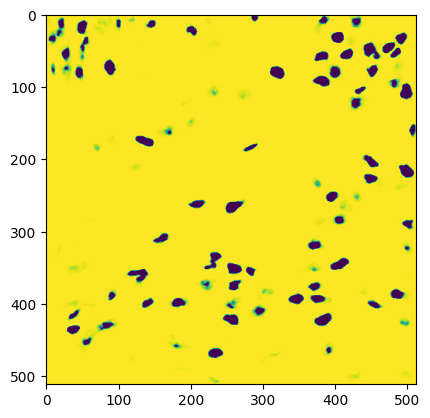

In [33]:
plt.imshow(preds[0][0])

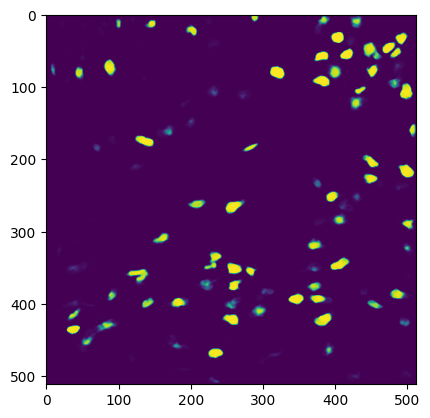

In [38]:
plt.imshow(preds[0][1])

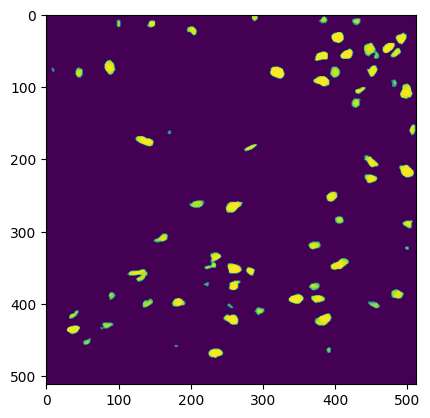

In [34]:
#### normal
plt.imshow(preds[0][1])

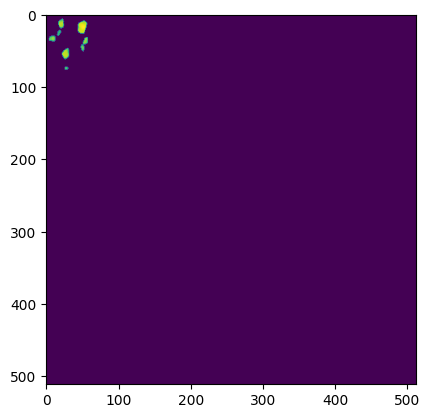

In [35]:
plt.imshow(preds[0][2])

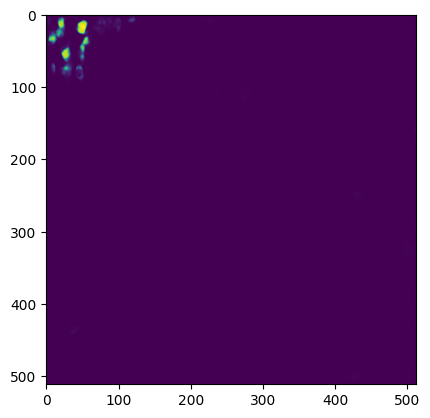

In [40]:
plt.imshow(preds[0][2])

In [36]:
n=2
weights = torch.Tensor(np.identity(n)*(.9-.1/(n-1)) + .1/(n-1))
torch.nn.Parameter(data=weights).t().unsqueeze(0).repeat(3, 1, 1)

tensor([[[0.9000, 0.1000],
         [0.1000, 0.9000]],

        [[0.9000, 0.1000],
         [0.1000, 0.9000]],

        [[0.9000, 0.1000],
         [0.1000, 0.9000]]], grad_fn=<RepeatBackward0>)

In [37]:
n=2
weights = torch.Tensor(np.identity(n)*(.9-.1/(n-1)) + .1/(n-1))

torch.nn.Parameter(data=weights).unsqueeze(0).repeat(3, 1, 1)

tensor([[[0.9000, 0.1000],
         [0.1000, 0.9000]],

        [[0.9000, 0.1000],
         [0.1000, 0.9000]],

        [[0.9000, 0.1000],
         [0.1000, 0.9000]]], grad_fn=<RepeatBackward0>)

In [49]:
k = torch.ones(3, 1, 24, 64, 64)
t = torch.ones(3, 1, 24, 64, 64)


In [50]:
out = torch.cat([k, t], dim=1)

In [51]:
out.shape

torch.Size([3, 2, 24, 64, 64])

In [63]:
torch.ones(1)[0]

tensor(1.)

In [72]:
aa = torch.nn.Parameter(torch.tensor(0.9))
ab = torch.nn.Parameter(torch.tensor(0.1))

ba = torch.nn.Parameter(torch.tensor(0.1))
bb = torch.nn.Parameter(torch.tensor(0.9))


In [53]:
torch.nn.Parameter(data=weights).unsqueeze(0).repeat(3, 1, 1).shape

torch.Size([3, 2, 2])

In [73]:
x_a = aa*torch.ones((3, 24, 64, 64)) + ab*torch.ones((3, 24, 64, 64))
x_b = aa*torch.ones((3, 24, 64, 64)) + ab*torch.ones((3, 24, 64, 64))

In [ ]:
class CrossStitch_Unit(nn.Module):
    def __init__(self, input_dim):
        super(CrossStitch_Unit, self).__init__()
        aa = torch.nn.Parameter(torch.tensor(0.9))
        ab = torch.nn.Parameter(torch.tensor(0.1))

        ba = torch.nn.Parameter(torch.tensor(0.1))
        bb = torch.nn.Parameter(torch.tensor(0.9))


    def forward(self, x1, x2):
        x1 = x1.view(-1, self.input_dim)
        x2 = x2.view(-1, self.input_dim)
        x = torch.cat([x1, x2], dim=1)
        output = torch.mm(x, self.alpha)
        return output[:, :self.input_dim].view_as(x1), output[:, self.input_dim:].view_as(x2)


class CrossStitchNetwork(nn.Module):
    def __init__(self, input_dim, n_class_1, n_class_2):
        super(CrossStitchNetwork, self).__init__()
        self.conv1 = nn.Conv2d(input_dim, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 5 * 5, 1024)
        self.fc2_1 = nn.Linear(1024, n_class_1)
        self.fc2_2 = nn.Linear(1024, n_class_2)
        self.cross_stitch_unit1 = CrossStitchUnit(32 * 14 * 14)
        self.cross_stitch_unit2 = CrossStitchUnit(64 * 7 * 7)
        self.cross_stitch_unit3 = CrossStitchUnit(1024)

    def forward(self, x):
        out1 = out2 = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        out1, out2 = self.cross_stitch_unit1(out1, out2)
        out1 = out2 = nn.functional.relu(nn.functional.max_pool2d(self.conv2(out1), 2))
        out1, out2 = self.cross_stitch_unit2(out1, out2)
        out1 = out2 = nn.functional.relu(self.fc1(out1.view(out1.size(0), -1)))
        out1, out2 = self.cross_stitch_unit3(out1, out2)
        out1 = self.fc2_1(out1)
        out2 = self.fc2_2(out2)
        return out1, out2
